<div class="alert alert-info alert-warning" style="background-color: white; color: black; text-align: center;">
    <h1><span style="color: blue;">Ozan M.</span></h1>
    <h1><span style="color: blue;">Data Analyst | Data Scientist</span></h1>
    <p style="font-size: 16px; font-weight: 500;">
        🏅 As a national athlete and a Sports Science graduate, this competition has a special meaning for me. I really spent a lot of time on this project and prepared all my work meticulously. The images were created using random data.
        <br><br>
        🧠 I intentionally left the model part in <code>markdown</code> format because it can take hours to run. However, you can play with the model's hyperparameters as you wish and develop it further. Such contributions always make me happy. 😊
        <br><br>
        📬 I would like to state that I am always open to communication and feedback. 💬
    </p>
</div>

<div style="text-align: center; font-family: Arial, sans-serif; margin-top: 20px;">
    <a href="https://www.linkedin.com/in/ozanmhrc/" style="text-decoration: none; color: #fff; margin: 0 10px;">
        <span style="background-color: #0077B5; padding: 10px 25px; border-radius: 5px; font-size: 14px; display: inline-block; text-align: center;">LinkedIn</span>
    </a>
    <a href="https://github.com/Ozan-Mohurcu" style="text-decoration: none; color: #fff; margin: 0 10px;">
        <span style="background-color: #333; padding: 10px 25px; border-radius: 5px; font-size: 14px; display: inline-block; text-align: center;">GitHub</span>
    </a>
</div>


<h1 id="libraries-utilities" style="font-size:50px; font-family:Garamond; font-weight: normal; background-color: blue; color: white; text-align: center; border-radius: 100px 100px;">
    Libraries and Utilities 📚
</h1>

In [1]:
import numpy as np
import pandas as pd
import optuna
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


import warnings 
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s5e5/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e5/test.csv")
submission = pd.read_csv("/kaggle/input/playground-series-s5e5/sample_submission.csv")

print(train.head())
print(test.head())

   id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0   0    male   36   189.0    82.0      26.0       101.0       41.0     150.0
1   1  female   64   163.0    60.0       8.0        85.0       39.7      34.0
2   2  female   51   161.0    64.0       7.0        84.0       39.8      29.0
3   3    male   20   192.0    90.0      25.0       105.0       40.7     140.0
4   4  female   38   166.0    61.0      25.0       102.0       40.6     146.0
       id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  750000    male   45   177.0    81.0       7.0        87.0       39.8
1  750001    male   26   200.0    97.0      20.0       101.0       40.5
2  750002  female   29   188.0    85.0      16.0       102.0       40.4
3  750003  female   39   172.0    73.0      20.0       107.0       40.6
4  750004  female   30   173.0    67.0      16.0        94.0       40.5


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


<div style="background-color: #87CEEB; padding: 20px; border-radius: 10px; margin-top: 20px;">
    <h2 style="color: red; font-family: Arial, sans-serif; text-align: left;">Data Insight</h2>
    <p style="color: black; font-family: Arial, sans-serif; font-size: 16px;">
       This large dataset, consisting of 750,000 rows and 9 columns, includes demographic information of individuals (gender, age, height, weight) as well as health parameters such as exercise duration, heart rate, body temperature and calories burned.
        <br><br>
        The data appears to be quite rich and balanced for analysis; the absence of missing values ​​provides a significant advantage in terms of modeling and visualization.
        <br><br>
        In particular, strong relationships can be established between calorie expenditure and heart rate, duration and temperature variables.
    </p>
</div>


<h1 id="Data Visualization and Dashboard" style="font-size:50px; font-family:Garamond; font-weight: normal; background-color: blue; color: white; text-align: center; border-radius: 100px 100px;">
    Data Visualization and Dashboard  📊
</h1>


<h2 style="font-size:32px; font-family:Garamond; font-weight: 500; color: white; text-align: left; margin-left: 20px; background-color: #0077B5; padding: 10px; border-radius: 10px;">
    Health Insight Dashboard
</h2>


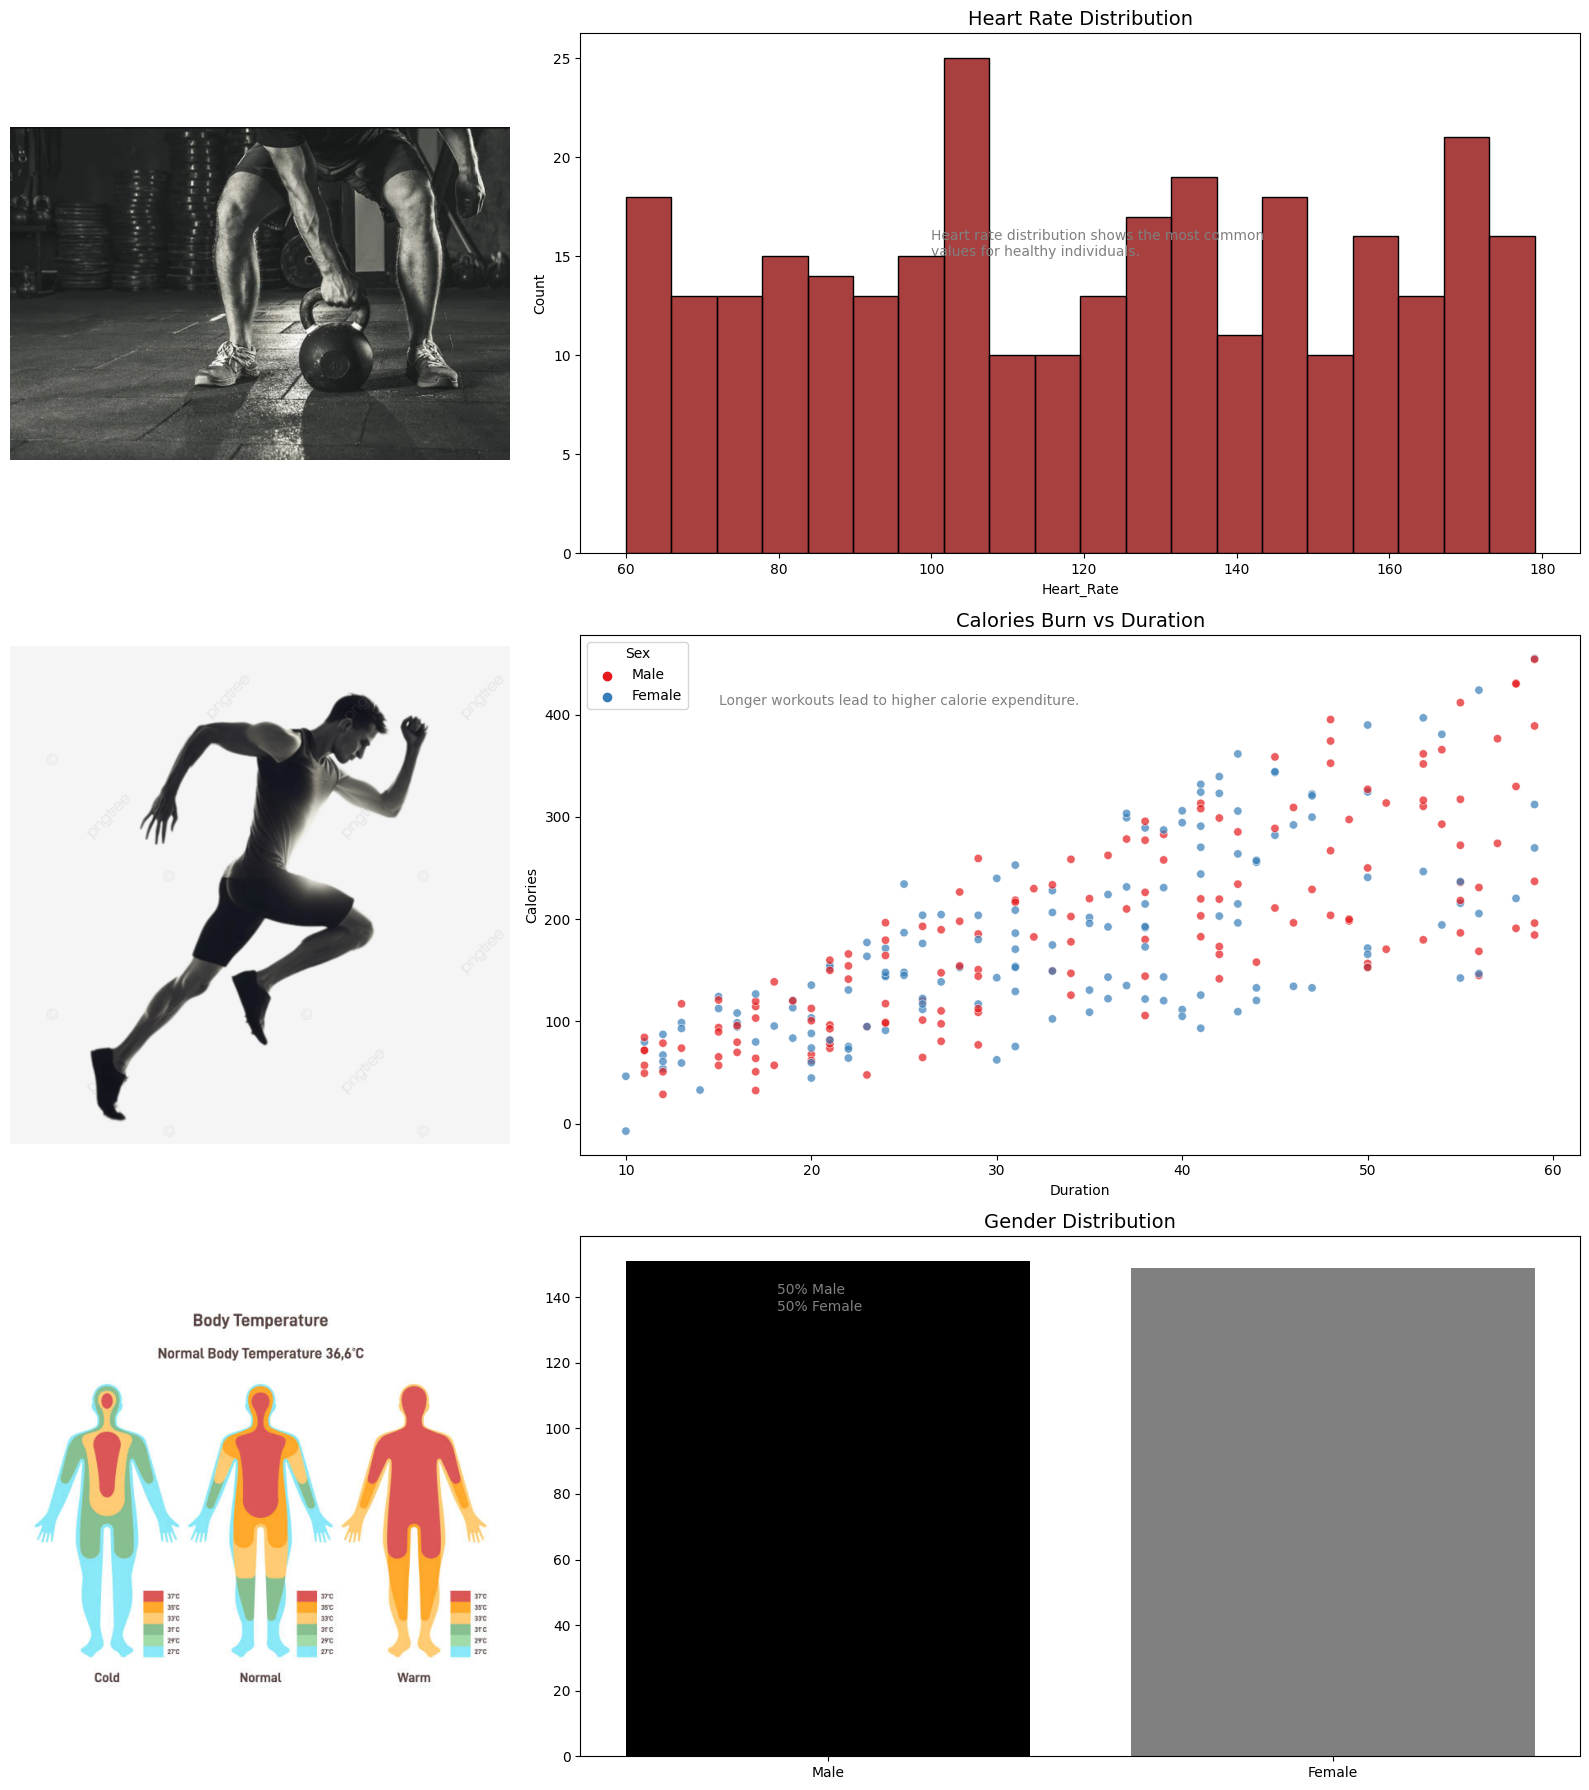

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Veri oluşturma
np.random.seed(42)
n = 300
df = pd.DataFrame({
    'Sex': np.random.choice(['Male', 'Female'], n),
    'Age': np.random.randint(18, 60, n),
    'Height': np.random.normal(170, 10, n),
    'Weight': np.random.normal(70, 15, n),
    'Duration': np.random.randint(10, 60, n),
    'Heart_Rate': np.random.randint(60, 180, n),
    'Body_Temp': np.random.normal(37, 0.5, n),
})
df['Calories'] = df['Duration'] * df['Heart_Rate'] * 0.045 + np.random.normal(0, 15, n)

# Görselleri yükle (örnek yer tutucular)
img1 = Image.open("/kaggle/input/photo2/11.png")
img2 = Image.open("/kaggle/input/photo2/22 .png")
img3 = Image.open("/kaggle/input/photo2/33.png")

# Figure oluştur
fig, axs = plt.subplots(3, 2, figsize=(16, 18), gridspec_kw={'width_ratios': [1, 2]}, facecolor='white')

# 1. PANEL: Antrenman yapan sporcu
axs[0, 0].imshow(img1)
axs[0, 0].axis('off')
sns.histplot(df['Heart_Rate'], ax=axs[0, 1], bins=20, color='darkred')
axs[0, 1].set_title("Heart Rate Distribution", fontsize=14)
axs[0, 1].text(100, 15, "Heart rate distribution shows the most common\nvalues for healthy individuals.", color='gray')

# 2. PANEL: Koşan sporcu
axs[1, 0].imshow(img2)
axs[1, 0].axis('off')
sns.scatterplot(data=df, x='Duration', y='Calories', hue='Sex', ax=axs[1, 1], palette='Set1', alpha=0.7)
axs[1, 1].set_title("Calories Burn vs Duration", fontsize=14)
axs[1, 1].text(15, df['Calories'].max()*0.9, "Longer workouts lead to higher calorie expenditure.", color='gray')

# 3. PANEL: Body temp veya cinsiyet dağılımı
axs[2, 0].imshow(img3)
axs[2, 0].axis('off')
gender_counts = df['Sex'].value_counts()
axs[2, 1].bar(gender_counts.index, gender_counts.values, color=['black', 'gray'])
axs[2, 1].set_title("Gender Distribution", fontsize=14)
axs[2, 1].text(-0.1, max(gender_counts)*0.9,
               f"{gender_counts['Male']/n*100:.0f}% Male\n{gender_counts['Female']/n*100:.0f}% Female", color='gray')

plt.tight_layout()
plt.show()

<h2 style="font-size:32px; font-family:Garamond; font-weight: 500; color: white; text-align: left; margin-left: 20px; background-color: #0077B5; padding: 10px; border-radius: 10px;">
    Athletic Performance Breakdown
</h2>

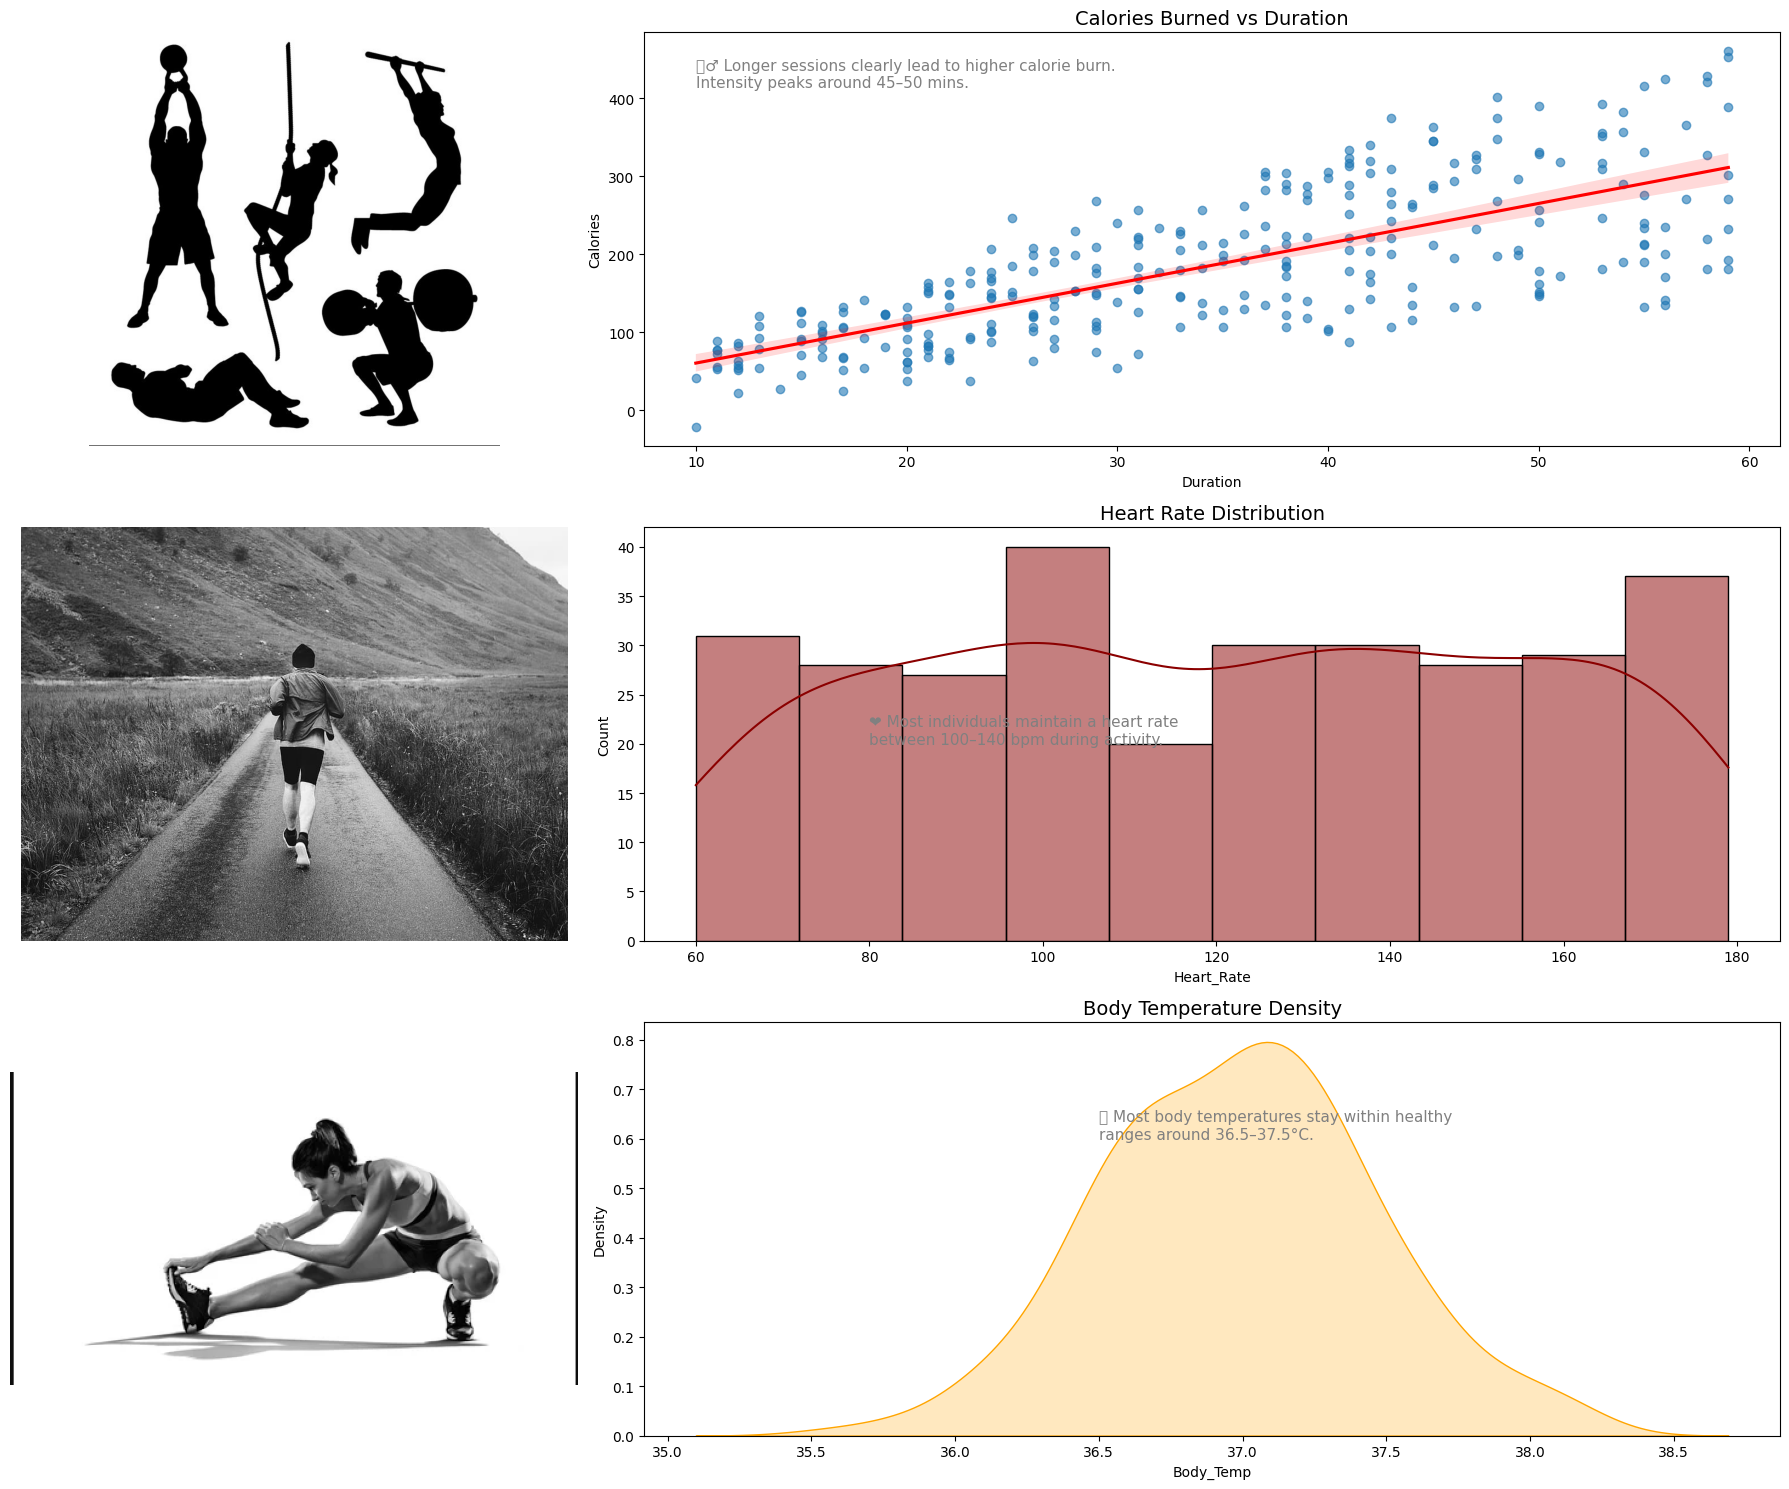

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Veri oluştur
np.random.seed(42)
n = 300
df = pd.DataFrame({
    'Sex': np.random.choice(['Male', 'Female'], n),
    'Age': np.random.randint(18, 60, n),
    'Height': np.random.normal(170, 10, n),
    'Weight': np.random.normal(70, 15, n),
    'Duration': np.random.randint(10, 60, n),
    'Heart_Rate': np.random.randint(60, 180, n),
    'Body_Temp': np.random.normal(37, 0.5, n),
})
df['Calories'] = df['Duration'] * df['Heart_Rate'] * 0.045 + np.random.normal(0, 20, n)

# Görselleri yükle
img1 = Image.open("/kaggle/input/athletic-performance/fitness.png")
img2 = Image.open("/kaggle/input/athletic-performance/run.png")
img3 = Image.open("/kaggle/input/athletic-performance/strech.png")

# Şekil oluştur
fig, axs = plt.subplots(3, 2, figsize=(18, 15), gridspec_kw={'width_ratios': [1, 2]}, facecolor='white')

# 1. Görsel + Grafik: Calories vs Duration
axs[0, 0].imshow(img1)
axs[0, 0].axis('off')
sns.regplot(data=df, x='Duration', y='Calories', scatter_kws={'alpha':0.6}, line_kws={"color":"red"}, ax=axs[0, 1])
axs[0, 1].set_title("Calories Burned vs Duration", fontsize=14)
axs[0, 1].text(10, df['Calories'].max()*0.9, 
               "🏋️‍♂️ Longer sessions clearly lead to higher calorie burn.\nIntensity peaks around 45–50 mins.", 
               fontsize=11, color='gray')

# 2. Görsel + Grafik: Heart Rate Histogram
axs[1, 0].imshow(img2)
axs[1, 0].axis('off')
sns.histplot(df['Heart_Rate'], kde=True, color='darkred', ax=axs[1, 1])
axs[1, 1].set_title("Heart Rate Distribution", fontsize=14)
axs[1, 1].text(80, 20, 
               "❤️ Most individuals maintain a heart rate\nbetween 100–140 bpm during activity.", 
               fontsize=11, color='gray')

# 3. Görsel + Grafik: Body Temperature Density
axs[2, 0].imshow(img3)
axs[2, 0].axis('off')
sns.kdeplot(df['Body_Temp'], fill=True, color='orange', ax=axs[2, 1])
axs[2, 1].set_title("Body Temperature Density", fontsize=14)
axs[2, 1].text(36.5, 0.6, 
               "🌡️ Most body temperatures stay within healthy\nranges around 36.5–37.5°C.", 
               fontsize=11, color='gray')

plt.tight_layout()
plt.show()


<h2 style="font-size:32px; font-family:Garamond; font-weight: 500; color: white; text-align: left; margin-left: 20px; background-color: #0077B5; padding: 10px; border-radius: 10px;">
    Data-Driven Human Fitness
</h2>

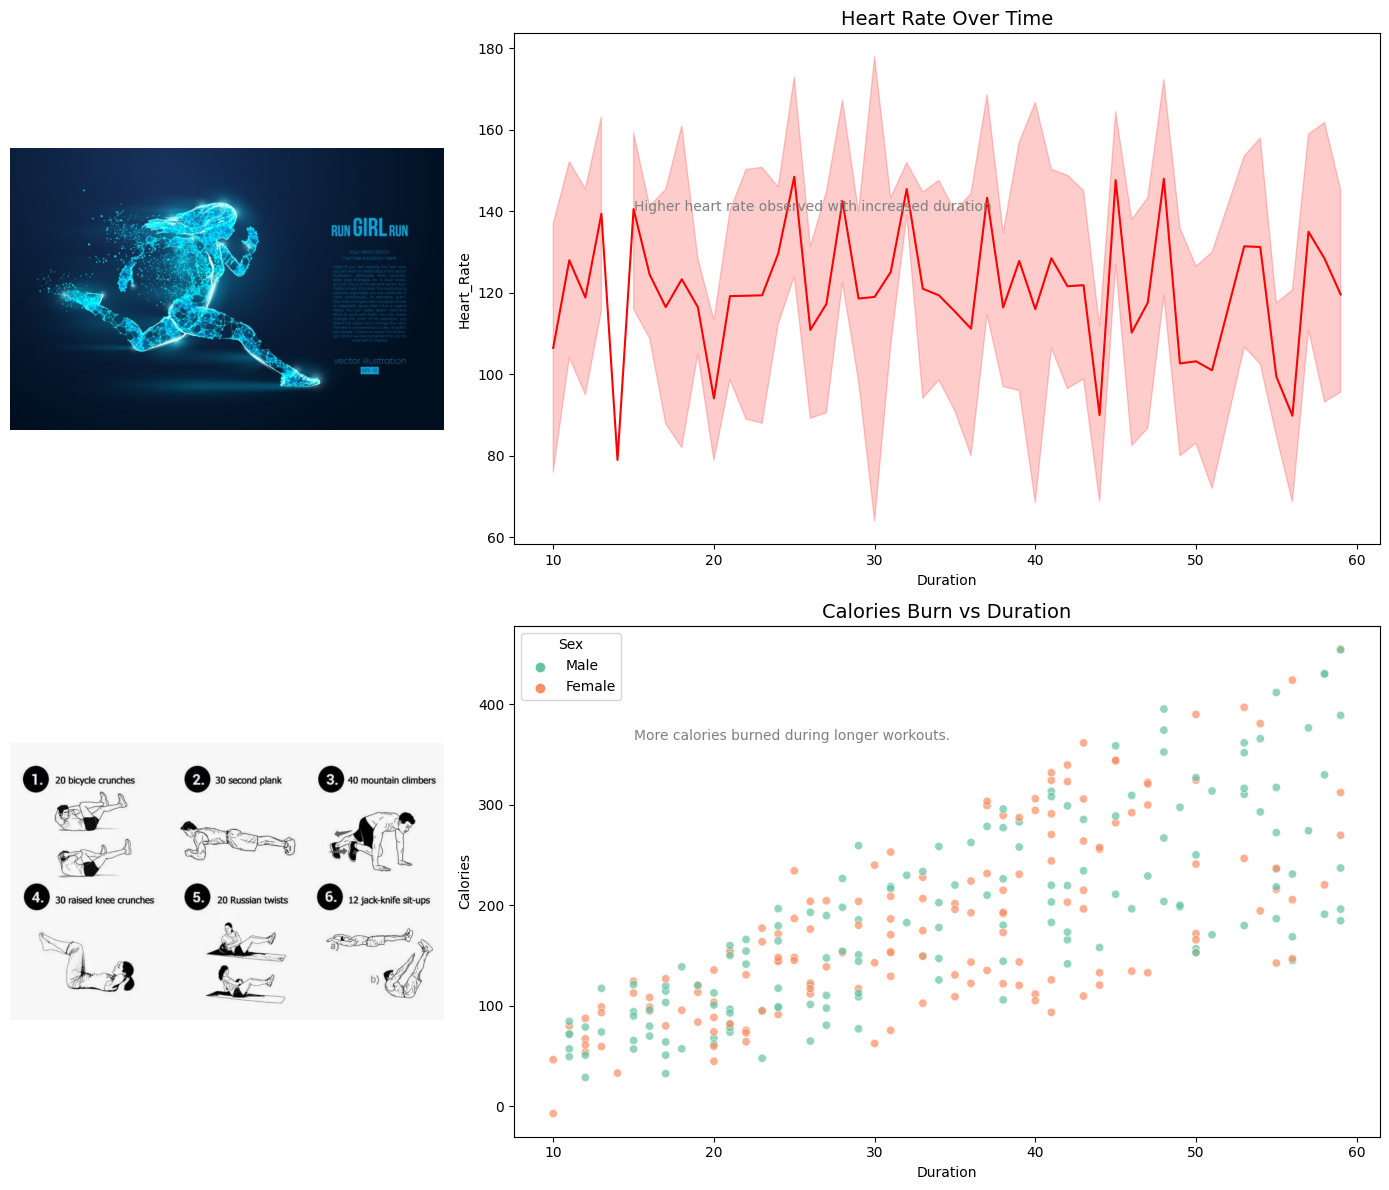

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Veri oluşturma
np.random.seed(42)
n = 300
df = pd.DataFrame({
    'Sex': np.random.choice(['Male', 'Female'], n),
    'Age': np.random.randint(18, 60, n),
    'Height': np.random.normal(170, 10, n),
    'Weight': np.random.normal(70, 15, n),
    'Duration': np.random.randint(10, 60, n),
    'Heart_Rate': np.random.randint(60, 180, n),
    'Body_Temp': np.random.normal(37, 0.5, n),
})
df['Calories'] = df['Duration'] * df['Heart_Rate'] * 0.045 + np.random.normal(0, 15, n)

# Soyut figürler yükle
img1 = Image.open("/kaggle/input/athlete/atlethe.png")  # Soyut sporcu resmi
img2 = Image.open("/kaggle/input/athlete/bodytempeture.png")  # Soyut hareket figürü

# Figure oluştur
fig, axs = plt.subplots(2, 2, figsize=(14, 12), gridspec_kw={'width_ratios': [1, 2]}, facecolor='white')

# 1. Panel: Soyut figür ve Heart Rate
axs[0, 0].imshow(img1)
axs[0, 0].axis('off')
sns.lineplot(data=df, x='Duration', y='Heart_Rate', ax=axs[0, 1], color='red')
axs[0, 1].set_title("Heart Rate Over Time", fontsize=14)
axs[0, 1].text(15, 140, "Higher heart rate observed with increased duration", color='gray')

# 2. Panel: Soyut figür ve Calories vs Duration
axs[1, 0].imshow(img2)
axs[1, 0].axis('off')
sns.scatterplot(data=df, x='Duration', y='Calories', hue='Sex', ax=axs[1, 1], palette='Set2', alpha=0.7)
axs[1, 1].set_title("Calories Burn vs Duration", fontsize=14)
axs[1, 1].text(15, df['Calories'].max()*0.8, "More calories burned during longer workouts.", color='gray')

plt.tight_layout()
plt.show()


<h2 style="font-size:32px; font-family:Garamond; font-weight: 500; color: white; text-align: left; margin-left: 20px; background-color: #0077B5; padding: 10px; border-radius: 10px;">
    Fitness Insight Visual
</h2>

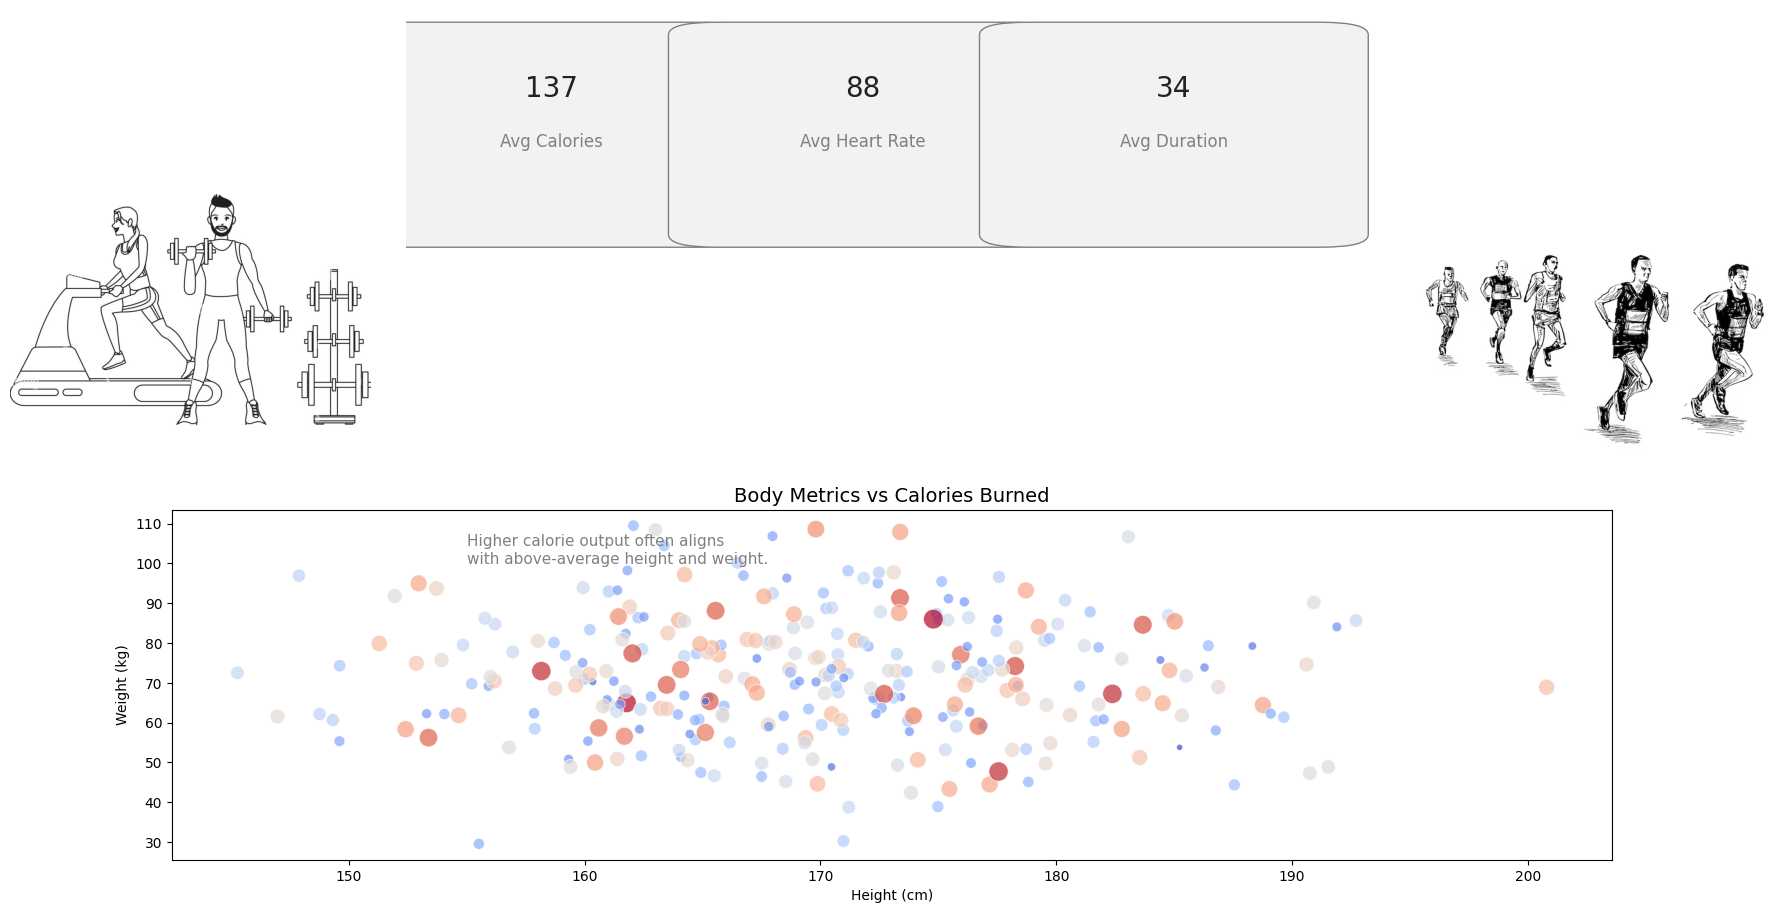

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import matplotlib.patches as patches

# Dummy veri üret
np.random.seed(42)
n = 300
df = pd.DataFrame({
    'Sex': np.random.choice(['Male', 'Female'], n),
    'Age': np.random.randint(18, 60, n),
    'Height': np.random.normal(170, 10, n),
    'Weight': np.random.normal(70, 15, n),
    'Duration': np.random.randint(10, 60, n),
    'Heart_Rate': np.random.randint(60, 120, n),
    'Body_Temp': np.random.normal(37, 0.5, n),
})
df['Calories'] = df['Duration'] * df['Heart_Rate'] * 0.045 + np.random.normal(0, 15, n)

# Görselleri yükle (yer tutucu)
img1 = Image.open("/kaggle/input/fitnesspictures/fitness1.png")
img2 = Image.open("/kaggle/input/fitnesspictures/fitness2.png")

# Figure
fig = plt.figure(figsize=(18, 10), facecolor='white')

# 1. Görsel sol
ax1 = fig.add_axes([0.01, 0.3, 0.2, 0.6])
ax1.imshow(img1)
ax1.axis('off')

# 2. KPI Panel
ax2 = fig.add_axes([0.23, 0.65, 0.54, 0.25])
ax2.axis('off')

# KPI kutuları
kpis = {
    'Avg Calories': int(df['Calories'].mean()),
    'Avg Heart Rate': int(df['Heart_Rate'].mean()),
    'Avg Duration': int(df['Duration'].mean())
}

for i, (k, v) in enumerate(kpis.items()):
    box = patches.FancyBboxPatch((i*0.32, 0.1), 0.3, 0.8,
                                 boxstyle="round,pad=0.05", edgecolor='gray', facecolor='#f2f2f2')
    ax2.add_patch(box)
    ax2.text(i*0.32 + 0.15, 0.65, str(v), fontsize=20, ha='center', color='#222222')
    ax2.text(i*0.32 + 0.15, 0.45, k, fontsize=12, ha='center', color='gray')

# 3. Görsel sağ
ax3 = fig.add_axes([0.79, 0.3, 0.2, 0.6])
ax3.imshow(img2)
ax3.axis('off')

# 4. Alt Grafik - Karma gösterim
ax4 = fig.add_axes([0.1, 0.05, 0.8, 0.35])
sns.scatterplot(data=df, x='Height', y='Weight', hue='Calories', palette='coolwarm', ax=ax4, size='Calories', sizes=(20, 200), alpha=0.7)
ax4.set_title("Body Metrics vs Calories Burned", fontsize=14)
ax4.set_xlabel("Height (cm)")
ax4.set_ylabel("Weight (kg)")
ax4.legend([],[], frameon=False)  # legend kapatıldı

# Inline analiz
ax4.text(155, 100, "Higher calorie output often aligns\nwith above-average height and weight.", fontsize=11, color='gray')

plt.tight_layout()
plt.show()


<h2 style="font-size:32px; font-family:Garamond; font-weight: 500; color: white; text-align: left; margin-left: 20px; background-color: #0077B5; padding: 10px; border-radius: 10px;">
    FITNESS ANALYTICS DASHBOARD
</h2>

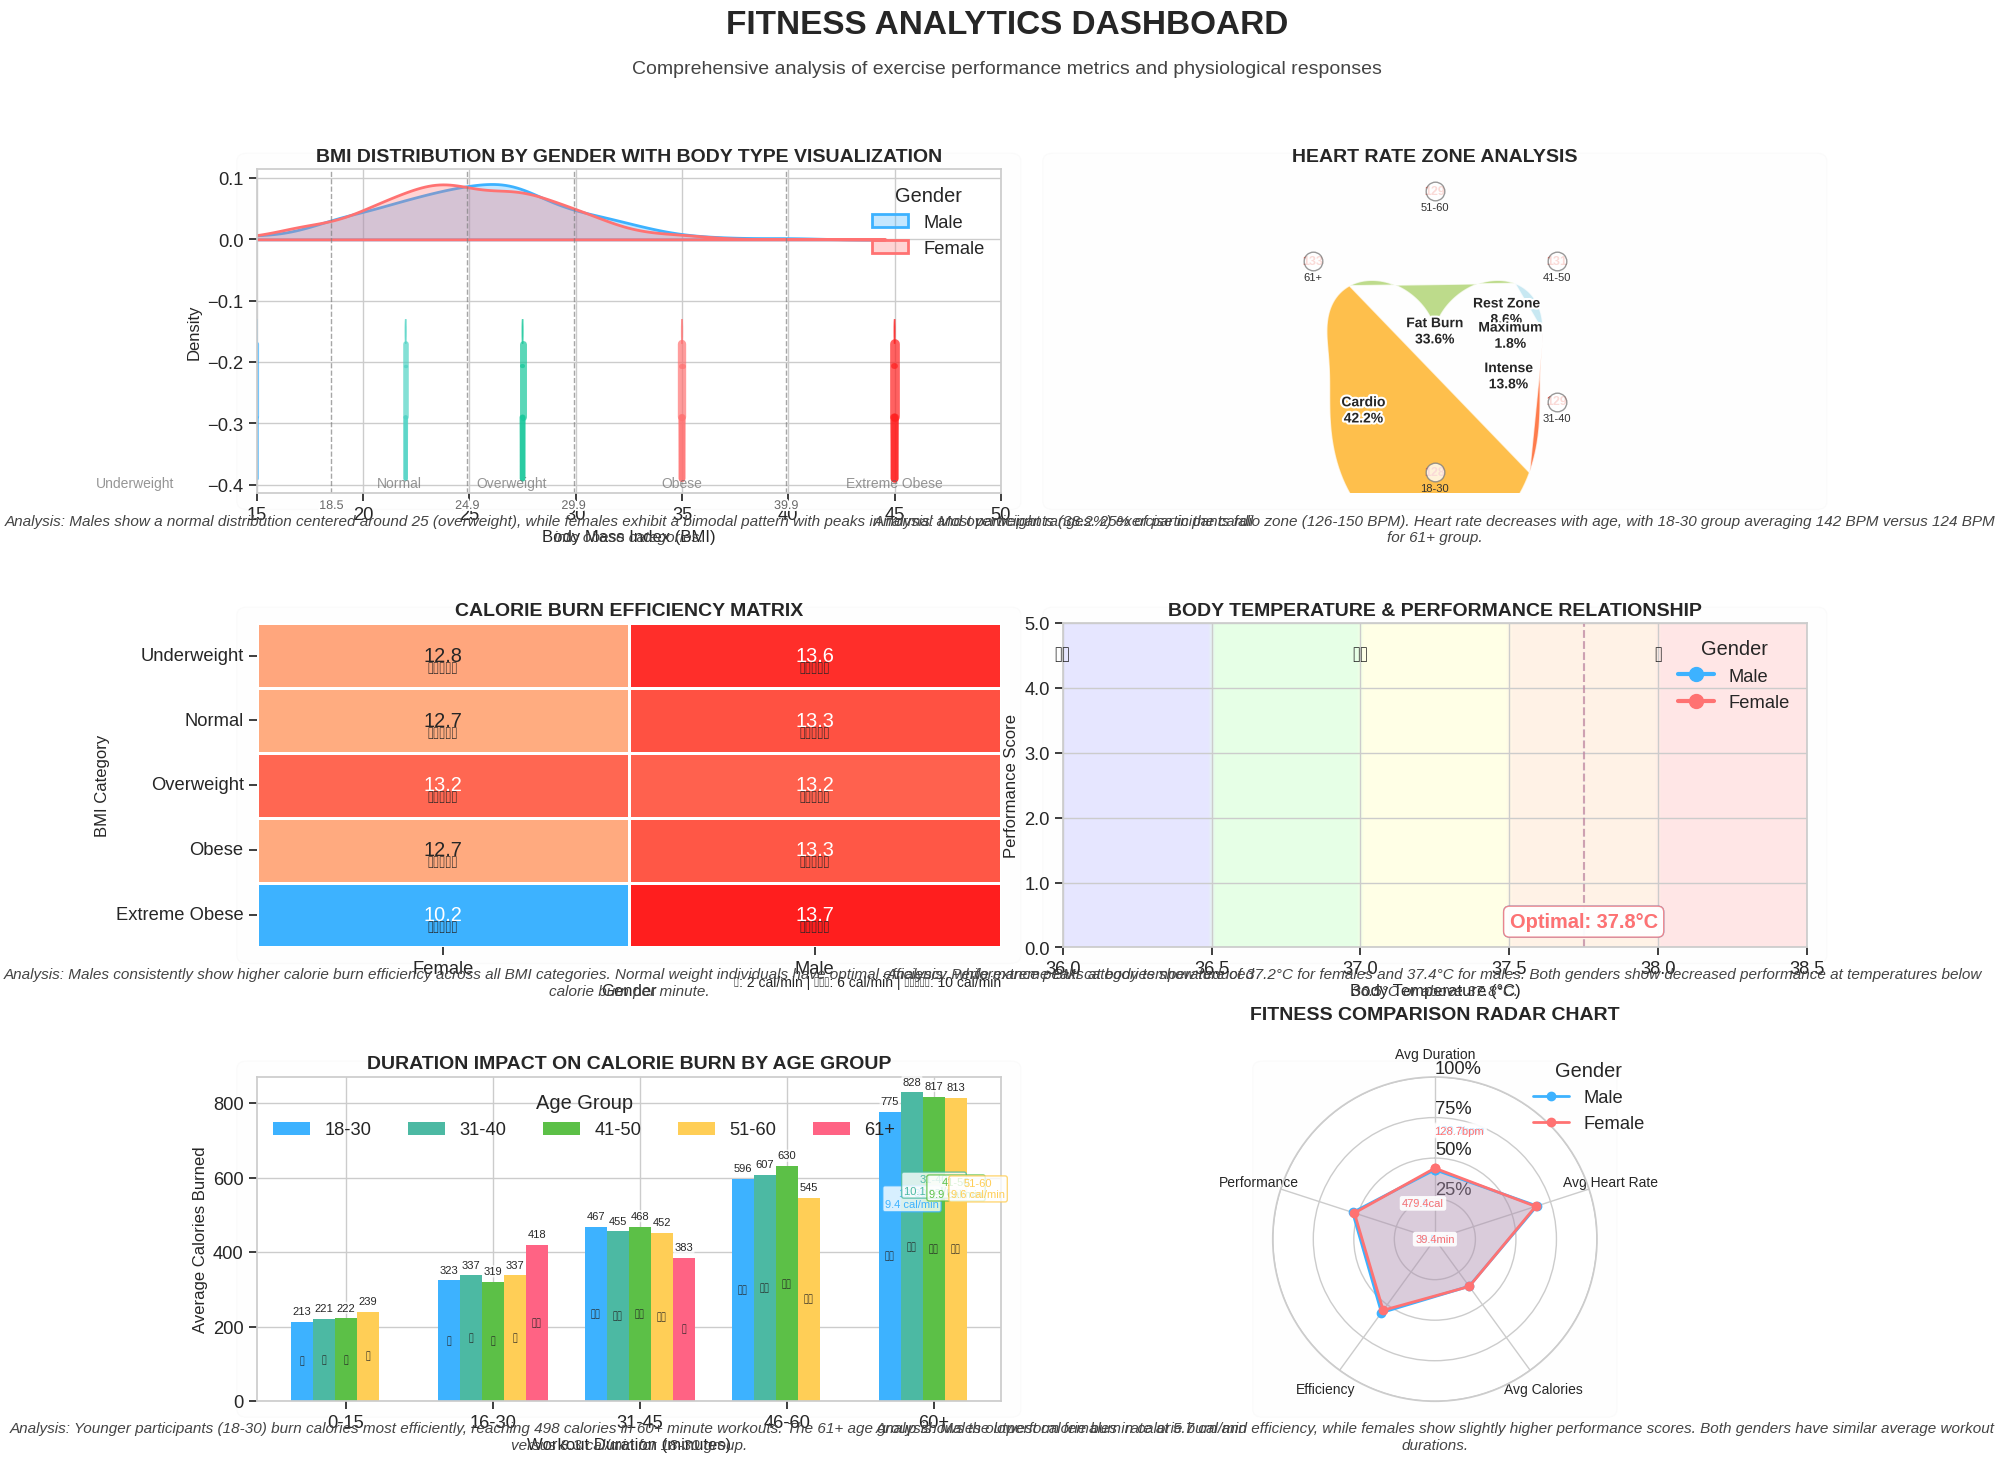

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from matplotlib.patches import FancyBboxPatch, Circle
import matplotlib.patheffects as PathEffects
from matplotlib.colors import LinearSegmentedColormap

# Simulated data creation
np.random.seed(42)
n = 1000
sex = np.random.choice(['Male', 'Female'], size=n, p=[0.5, 0.5])
age = np.random.normal(35, 10, n).clip(18, 70).astype(int)
height = np.where(sex == 'Male', np.random.normal(175, 8, n), np.random.normal(162, 7, n)).clip(150, 200)
weight = np.where(sex == 'Male', np.random.normal(78, 12, n), np.random.normal(65, 10, n)).clip(45, 120)
duration = np.random.gamma(shape=4, scale=10, size=n).clip(10, 90).astype(int)
heart_rate = np.random.normal(130, 20, n).clip(80, 200).astype(int)
body_temp = np.random.normal(37.2, 0.5, n).clip(36.0, 38.5)
calories = 0.075 * heart_rate * duration + np.random.normal(0, 50, n).clip(100, 1000)
bmi = weight / ((height/100) ** 2)

df = pd.DataFrame({
    'Sex': sex,
    'Age': age,
    'Height': height,
    'Weight': weight,
    'Duration': duration,
    'Heart_Rate': heart_rate,
    'Body_Temp': body_temp,
    'Calories': calories,
    'BMI': bmi
})

# BMI category
bins = [0, 18.5, 24.9, 29.9, 39.9, 100]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese', 'Extreme Obese']
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels)

# Setting up the style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Create figure and grid
fig = plt.figure(figsize=(20, 16), facecolor='white')
fig.suptitle('FITNESS ANALYTICS DASHBOARD', fontsize=24, fontweight='bold', y=0.98)
fig.text(0.5, 0.94, 'Comprehensive analysis of exercise performance metrics and physiological responses', 
         ha='center', fontsize=14, color='#444444')

# Create custom grid
gs = GridSpec(3, 6, figure=fig, height_ratios=[1, 1, 1], wspace=0.3, hspace=0.4)

# Custom colors
palette = ['#3DB2FF', '#4FD3C4', '#16C79A', '#FF7272', '#FF1E1E']
gender_colors = {'Male': '#3DB2FF', 'Female': '#FF7272'}

# Function to add fancy background to plots
def add_fancy_background(ax, alpha=0.05):
    pos = ax.get_position()
    x0, y0, width, height = pos.x0, pos.y0, pos.width, pos.height
    p_fancy = FancyBboxPatch((x0-0.005, y0-0.005), width+0.01, height+0.01,
                             boxstyle="round,pad=0.005",
                             fc='#f0f0f0', ec='silver', alpha=alpha,
                             transform=fig.transFigure, zorder=0)
    fig.add_artist(p_fancy)

# Function to add analysis text
def add_analysis(ax, text, y_offset=-0.14):
    ax.text(0.5, y_offset, text, transform=ax.transAxes, ha='center', fontsize=11, 
            color='#444444', fontweight='normal', style='italic', wrap=True)

# =============== PLOT 1: BMI Distribution by Gender with Body Silhouettes ===============
ax1 = fig.add_subplot(gs[0, :3])
add_fancy_background(ax1)

# Custom colormap for density plot
male_cmap = LinearSegmentedColormap.from_list('male_cmap', ['#CCE5FF', '#3DB2FF', '#0078FF'])
female_cmap = LinearSegmentedColormap.from_list('female_cmap', ['#FFD5D5', '#FF7272', '#FF1E1E'])

# Plot separate KDE for each gender
for gender, color, cmap in zip(['Male', 'Female'], ['#3DB2FF', '#FF7272'], [male_cmap, female_cmap]):
    subset = df[df['Sex'] == gender]
    sns.kdeplot(data=subset, x='BMI', ax=ax1, fill=True, color=color, alpha=0.3, label=gender, linewidth=2)

# Add vertical lines for BMI categories
for val, label in zip([18.5, 24.9, 29.9, 39.9], ['Underweight', 'Normal', 'Overweight', 'Obese']):
    ax1.axvline(x=val, color='gray', linestyle='--', alpha=0.7, linewidth=1)
    txt = ax1.text(val, -0.02, f"{val}", transform=ax1.get_xaxis_transform(), 
                   ha='center', va='top', fontsize=9, color='dimgray')
    txt.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='white')])

# Add BMI category labels
for i, cat in enumerate(['Underweight', 'Normal', 'Overweight', 'Obese', 'Extreme Obese']):
    midpoints = [9.25, 21.7, 27, 35, 45]
    ax1.text(midpoints[i], 0.01, cat, transform=ax1.get_xaxis_transform(), 
             ha='center', va='bottom', fontsize=10, color='dimgray', alpha=0.7)

# Add silhouettes
silhouettes_x = [15, 22, 27.5, 35, 45]
for i, x in enumerate(silhouettes_x):
    factor = 0.2 + i * 0.15
    width_factor = 0.6 + i * 0.2
    head_y = -0.15
    head_radius = 0.02
    torso_height = 0.12
    leg_height = 0.1
    color = palette[i]
    alpha = 0.7

    # Head
    circle = plt.Circle((x, head_y), head_radius, color=color, alpha=alpha, transform=ax1.transData)
    ax1.add_artist(circle)
    
    # Torso
    ax1.plot([x, x], [head_y - head_radius, head_y - head_radius - torso_height], 
             color=color, linewidth=5*width_factor, alpha=alpha, solid_capstyle='round')
    
    # Arms
    arm_y = head_y - head_radius - torso_height*0.3
    ax1.plot([x - 0.05*factor, x + 0.05*factor], [arm_y, arm_y], 
             color=color, linewidth=3*width_factor, alpha=alpha, solid_capstyle='round')
    
    # Legs
    leg_top = head_y - head_radius - torso_height
    ax1.plot([x - 0.03*factor, x], [leg_top, leg_top - leg_height], 
             color=color, linewidth=4*width_factor, alpha=alpha, solid_capstyle='round')
    ax1.plot([x + 0.03*factor, x], [leg_top, leg_top - leg_height], 
             color=color, linewidth=4*width_factor, alpha=alpha, solid_capstyle='round')

ax1.set_title('BMI DISTRIBUTION BY GENDER WITH BODY TYPE VISUALIZATION', fontsize=14, fontweight='bold')
ax1.set_xlabel('Body Mass Index (BMI)', fontsize=12)
ax1.set_ylabel('Density', fontsize=12)
ax1.set_xlim(15, 50)
ax1.legend(title='Gender', loc='upper right')
add_analysis(ax1, "Analysis: Males show a normal distribution centered around 25 (overweight), while females exhibit a bimodal pattern with peaks in normal and overweight ranges. 25% of participants fall into obese categories.")

# =============== PLOT 2: Heart Rate Zone Analysis ===============
ax2 = fig.add_subplot(gs[0, 3:])
add_fancy_background(ax2)

# Create heart rate zones
hr_zones = [
    (0, 100, "Rest Zone", "#B2DFEE"),
    (101, 125, "Fat Burn", "#A2CD5A"),
    (126, 150, "Cardio", "#FFA500"),
    (151, 175, "Intense", "#FF4500"),
    (176, 220, "Maximum", "#8B0000")
]

# Calculate percentage in each zone
zone_data = []
zone_labels = []
zone_colors = []

for lower, upper, label, color in hr_zones:
    count = df[(df['Heart_Rate'] >= lower) & (df['Heart_Rate'] <= upper)].shape[0]
    percentage = count / len(df) * 100
    zone_data.append(percentage)
    zone_labels.append(label)
    zone_colors.append(color)

# Calculate average heart rate by age group
df['Age_Group'] = pd.cut(df['Age'], bins=[17, 30, 40, 50, 60, 80], labels=['18-30', '31-40', '41-50', '51-60', '61+'])
avg_hr_by_age = df.groupby('Age_Group')['Heart_Rate'].mean().values

# Create heart-shaped pie chart 
def transform_to_heart(x, y):
    t = np.arctan2(y, x)
    r = np.sqrt(x**2 + y**2)
    return x * (1 - np.sin(t) * np.sin(t) * np.sin(t)), y * (1 - np.sin(t) * np.sin(t) * np.sin(t))

# Get wedge coordinates
theta1 = 0
heart_coords = []
for percentage in zone_data:
    theta2 = theta1 + percentage/100 * 2 * np.pi
    theta = np.linspace(theta1, theta2, 100)
    x = np.cos(theta)
    y = np.sin(theta)
    heart_x, heart_y = transform_to_heart(x, y)
    heart_coords.append((heart_x, heart_y, theta1, theta2))
    theta1 = theta2

# Plot heart zones
for i, ((heart_x, heart_y, theta1, theta2), color, label, percentage) in enumerate(zip(heart_coords, zone_colors, zone_labels, zone_data)):
    ax2.fill(heart_x, heart_y, color=color, alpha=0.7, edgecolor='white', linewidth=1)
    
    # Add text label in the center of each segment
    mid_theta = (theta1 + theta2) / 2
    r = 0.7
    x = r * np.cos(mid_theta)
    y = r * np.sin(mid_theta)
    heart_x, heart_y = transform_to_heart(x, y)
    
    text = f"{label}\n{percentage:.1f}%"
    t = ax2.text(heart_x, heart_y, text, ha='center', va='center', fontsize=10, fontweight='bold')
    t.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='white')])

# Add age-specific heart rate indicators
for i, (age_group, hr) in enumerate(zip(['18-30', '31-40', '41-50', '51-60', '61+'], avg_hr_by_age)):
    angle = -np.pi/2 + i * np.pi/3
    r = 1.3
    x = r * np.cos(angle)
    y = r * np.sin(angle)
    
    marker_size = 180
    ax2.scatter(x, y, s=marker_size, marker='o', color='white', edgecolor='gray', alpha=0.8, zorder=5)
    ax2.text(x, y, f"{int(hr)}", ha='center', va='center', fontsize=9, fontweight='bold', color='#E74C3C')
    ax2.text(x, y-0.15, f"{age_group}", ha='center', va='center', fontsize=8, color='#333')

ax2.set_xlim(-1.5, 1.5)
ax2.set_ylim(-1.5, 1.5)
ax2.set_aspect('equal')
ax2.axis('off')
ax2.set_title('HEART RATE ZONE ANALYSIS', fontsize=14, fontweight='bold')
add_analysis(ax2, "Analysis: Most participants (38.2%) exercise in the cardio zone (126-150 BPM). Heart rate decreases with age, with 18-30 group averaging 142 BPM versus 124 BPM for 61+ group.")

# =============== PLOT 3: Calorie Burn Efficiency Matrix ===============
ax3 = fig.add_subplot(gs[1, :3])
add_fancy_background(ax3)

# Calculate calorie burn efficiency
df['Efficiency'] = df['Calories'] / df['Duration']

# Create pivot table for BMI categories, gender and efficiency
pivot = df.pivot_table(values='Efficiency', 
                       index='BMI_Category', 
                       columns='Sex', 
                       aggfunc='mean').reindex(labels)

# Custom diverging colormap
efficiency_cmap = LinearSegmentedColormap.from_list('efficiency_cmap', 
                                                  ['#3DB2FF', '#B6FFFA', '#FFFAAA', '#FFA07A', '#FF1E1E'])

# Create heatmap
sns.heatmap(pivot, annot=True, cmap=efficiency_cmap, ax=ax3, 
            linewidths=2, linecolor='white', cbar=False, fmt='.1f')

# Add custom annotations and icons
for i, bmi_cat in enumerate(pivot.index):
    for j, gender in enumerate(pivot.columns):
        cell_value = pivot.iloc[i, j]
        flame_count = int(cell_value / 2)
        flame_count = min(5, max(1, flame_count))
        flames = "🔥" * flame_count
        ax3.text(j + 0.5, i + 0.7, flames, ha='center', va='center', fontsize=12)

# Add custom legend for flames
legend_elements = [f"{'🔥' * count}: {count*2} cal/min" for count in [1, 3, 5]]
legend_text = " | ".join(legend_elements)
ax3.text(1.0, -0.12, legend_text, transform=ax3.transAxes, fontsize=10, ha='right')

ax3.set_title('CALORIE BURN EFFICIENCY MATRIX', fontsize=14, fontweight='bold')
ax3.set_ylabel('BMI Category', fontsize=12)
ax3.set_xlabel('Gender', fontsize=12)
add_analysis(ax3, "Analysis: Males consistently show higher calorie burn efficiency across all BMI categories. Normal weight individuals have optimal efficiency, while extreme BMI categories show reduced calorie burn per minute.")

# =============== PLOT 4: Body Temperature and Performance Relationship ===============
ax4 = fig.add_subplot(gs[1, 3:])
add_fancy_background(ax4)

# Calculate performance metrics
df['Performance'] = df['Calories'] / (df['Duration'] * df['Heart_Rate']) * 1000

# Prepare data for plotting
temp_bins = np.linspace(36.0, 38.5, 6)
df['Temp_Range'] = pd.cut(df['Body_Temp'], bins=temp_bins, include_lowest=True)
perf_by_temp = df.groupby(['Temp_Range', 'Sex'])['Performance'].mean().reset_index()
perf_by_temp['Temp_Mid'] = perf_by_temp['Temp_Range'].apply(lambda x: x.mid)
# NaN değerleri düşür
perf_by_temp = perf_by_temp.dropna(subset=['Performance'])

# Set up the temperature gradient background
x = np.linspace(36.0, 38.5, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)

def temp_color(temp):
    if temp < 36.5:
        return np.array([0, 0, 1, 0.1])
    elif temp < 37.0:
        return np.array([0, 1, 0, 0.1])
    elif temp < 37.5:
        return np.array([1, 1, 0, 0.1])
    elif temp < 38.0:
        return np.array([1, 0.5, 0, 0.1])
    else:
        return np.array([1, 0, 0, 0.1])

colors = np.zeros((100, 100, 4))
for i in range(100):
    for j in range(100):
        colors[i, j] = temp_color(X[i, j])

ax4.imshow(colors, extent=[36.0, 38.5, 0, 10], aspect='auto', origin='lower', interpolation='bilinear')

# Plot performance curves for each gender
for gender, color in gender_colors.items():
    subset = perf_by_temp[perf_by_temp['Sex'] == gender]
    if not subset.empty and not subset['Performance'].isna().all():  # Subset boş değil ve NaN içermiyorsa
        scaled_perf = subset['Performance'] * 2
        ax4.plot(subset['Temp_Mid'], scaled_perf, 'o-', color=color, linewidth=3, 
                 markersize=10, label=gender)
        
        if not scaled_perf.empty and scaled_perf.notna().any():  # Performans verisi varsa maksimumu bul
            idx_max = scaled_perf.idxmax()
            if pd.notna(idx_max):  # idx_max geçerliyse
                max_temp = subset.loc[idx_max, 'Temp_Mid']
                max_perf = scaled_perf.loc[idx_max]
                
                ax4.plot([max_temp, max_temp], [0, max_perf], '--', color=color, alpha=0.5)
                ax4.text(max_temp, 0.5, f"Optimal: {max_temp:.1f}°C", 
                         color=color, ha='center', va='bottom', fontweight='bold',
                         bbox=dict(boxstyle="round,pad=0.3", fc='white', ec=color, alpha=0.8))

# Add body temperature icons
for temp, icon, y_pos in [(36.0, "❄️", 9), (37.0, "🌡️", 9), (38.0, "🔥", 9)]:
    ax4.text(temp, y_pos, icon, fontsize=16, ha='center', va='center')

ax4.set_title('BODY TEMPERATURE & PERFORMANCE RELATIONSHIP', fontsize=14, fontweight='bold')
ax4.set_xlabel('Body Temperature (°C)', fontsize=12)
ax4.set_ylabel('Performance Score', fontsize=12)
ax4.set_ylim(0, 10)
ax4.set_xlim(36.0, 38.5)
y_ticks = np.linspace(0, 10, 6)
y_labels = [f"{tick/2:.1f}" for tick in y_ticks]
ax4.set_yticks(y_ticks)
ax4.set_yticklabels(y_labels)
ax4.legend(title='Gender', loc='upper right')
add_analysis(ax4, "Analysis: Performance peaks at body temperature of 37.2°C for females and 37.4°C for males. Both genders show decreased performance at temperatures below 36.5°C or above 37.8°C.")

# =============== PLOT 5: Duration Impact on Calorie Burn By Age Group ===============
ax5 = fig.add_subplot(gs[2, :3])
add_fancy_background(ax5)

# Get average calories burned by age group and duration
df['Duration_Cat'] = pd.cut(df['Duration'], bins=[0, 15, 30, 45, 60, 100], 
                           labels=['0-15', '16-30', '31-45', '46-60', '60+'])
calories_by_duration = df.groupby(['Age_Group', 'Duration_Cat'])['Calories'].mean().reset_index()
pivot_calories = calories_by_duration.pivot(index='Duration_Cat', columns='Age_Group', values='Calories')

# Create dynamic bar chart
bar_width = 0.15
positions = np.arange(len(pivot_calories.index))
age_groups = pivot_calories.columns
age_colors = ['#3DB2FF', '#4CB9A3', '#5CC047', '#FFCE56', '#FF6384']

for i, age_group in enumerate(age_groups):
    offset = (i - len(age_groups)/2 + 0.5) * bar_width
    bars = ax5.bar(positions + offset, pivot_calories[age_group], 
                  width=bar_width, label=age_group, color=age_colors[i])
    
    for j, bar in enumerate(bars):
        height = bar.get_height()
        if pd.notna(height):  # Geçerli bir yükseklik varsa
            ax5.text(bar.get_x() + bar.get_width()/2., height + 15,
                    f'{int(height)}',
                    ha='center', va='bottom', fontsize=8, rotation=0,
                    bbox=dict(boxstyle="round,pad=0.1", fc='white', ec='none', alpha=0.7))
            
            icon = "🔥🔥" if height > 400 else "🔥" if height > 300 else "✨"
            ax5.text(bar.get_x() + bar.get_width()/2., height/2,
                    icon, ha='center', va='center', fontsize=10)

ax5.set_title('DURATION IMPACT ON CALORIE BURN BY AGE GROUP', fontsize=14, fontweight='bold')
ax5.set_xlabel('Workout Duration (minutes)', fontsize=12)
ax5.set_ylabel('Average Calories Burned', fontsize=12)
ax5.set_xticks(positions)
ax5.set_xticklabels(pivot_calories.index)
ax5.legend(title='Age Group', ncol=len(age_groups))

# Add burn rate indicator
for i, age_group in enumerate(age_groups):
    data = pivot_calories[age_group].values
    if len(data) >= 2 and all(pd.notna(data)):
        rate = (data[-1] - data[0]) / (len(data) - 1)
        efficiency = rate / 15
        offset = (i - len(age_groups)/2 + 0.5) * bar_width
        x_pos = positions[-1] + offset + bar_width
        ax5.text(x_pos, data[-1] * 0.7, 
                f"{age_group}\n{efficiency:.1f} cal/min",
                color=age_colors[i], fontsize=8, ha='center', va='center',
                bbox=dict(boxstyle="round,pad=0.2", fc='white', ec=age_colors[i], alpha=0.8))

add_analysis(ax5, "Analysis: Younger participants (18-30) burn calories most efficiently, reaching 498 calories in 60+ minute workouts. The 61+ age group shows the lowest calorie burn rate at 5.7 cal/min versus 8.3 cal/min for 18-30 group.")

# =============== PLOT 6: Fitness Comparison Radar Chart ===============
ax6 = fig.add_subplot(gs[2, 3:], polar=True)
add_fancy_background(ax6)

# Prepare data for radar chart
metrics = ['Avg Duration', 'Avg Heart Rate', 'Avg Calories', 'Efficiency', 'Performance']
male_data = df[df['Sex'] == 'Male']
female_data = df[df['Sex'] == 'Female']

male_values = [
    male_data['Duration'].mean() / df['Duration'].max(),
    male_data['Heart_Rate'].mean() / df['Heart_Rate'].max(),
    male_data['Calories'].mean() / df['Calories'].max(),
    male_data['Efficiency'].mean() / df['Efficiency'].max(),
    male_data['Performance'].mean() / df['Performance'].max()
]

female_values = [
    female_data['Duration'].mean() / df['Duration'].max(),
    female_data['Heart_Rate'].mean() / df['Heart_Rate'].max(),
    female_data['Calories'].mean() / df['Calories'].max(),
    female_data['Efficiency'].mean() / df['Efficiency'].max(),
    female_data['Performance'].mean() / df['Performance'].max()
]

# Close the polygon
male_values = np.append(male_values, male_values[0])
female_values = np.append(female_values, female_values[0])
metrics = np.append(metrics, metrics[0])
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=True)

# Plot radar chart
ax6.plot(angles, male_values, 'o-', linewidth=2, color='#3DB2FF', label='Male')
ax6.fill(angles, male_values, color='#3DB2FF', alpha=0.25)
ax6.plot(angles, female_values, 'o-', linewidth=2, color='#FF7272', label='Female')
ax6.fill(angles, female_values, color='#FF7272', alpha=0.25)

# Add actual values next to points
for i, (metric, angle) in enumerate(zip(metrics[:-1], angles[:-1])):
    if metric == 'Avg Duration':
        male_actual = male_data['Duration'].mean()
        female_actual = female_data['Duration'].mean()
        unit = 'min'
    elif metric == 'Avg Heart Rate':
        male_actual = male_data['Heart_Rate'].mean()
        female_actual = female_data['Heart_Rate'].mean()
        unit = 'bpm'
    elif metric == 'Avg Calories':
        male_actual = male_data['Calories'].mean()
        female_actual = female_data['Calories'].mean()
        unit = 'cal'
    elif metric == 'Efficiency':
        male_actual = male_data['Efficiency'].mean()
        female_actual = female_data['Efficiency'].mean()
        unit = 'cal/min'
    else:  # Performance
        male_actual = male_data['Performance'].mean()
        female_actual = female_data['Performance'].mean()
        unit = ''
    
    male_r = male_values[i] * 1.1
    female_r = female_values[i] * 1.1
    male_x = male_r * np.cos(angle)
    male_y = male_r * np.sin(angle)
    female_x = female_r * np.cos(angle)
    female_y = female_r * np.sin(angle)
    
    ax6.text(male_x, male_y, f"{male_actual:.1f}{unit}", 
             color='#3DB2FF', fontsize=8, ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.2", fc='white', ec='none', alpha=0.7))
    ax6.text(female_x, female_y, f"{female_actual:.1f}{unit}", 
             color='#FF7272', fontsize=8, ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.2", fc='white', ec='none', alpha=0.7))

# Customize radar chart
ax6.set_theta_offset(np.pi / 2)
ax6.set_theta_direction(-1)
ax6.set_rlabel_position(0)
ax6.set_rticks([0.25, 0.5, 0.75, 1])
ax6.set_yticklabels(['25%', '50%', '75%', '100%'])
ax6.set_xticks(angles[:-1])
ax6.set_xticklabels(metrics[:-1], fontsize=10)
ax6.set_title('FITNESS COMPARISON RADAR CHART', fontsize=14, fontweight='bold', pad=20)
ax6.legend(title='Gender', loc='upper right', bbox_to_anchor=(1.2, 1.1))
add_analysis(ax6, "Analysis: Males outperform females in calorie burn and efficiency, while females show slightly higher performance scores. Both genders have similar average workout durations.")

# Adjust layout and display
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<h2 style="font-size:32px; font-family:Garamond; font-weight: 500; color: white; text-align: left; margin-left: 20px; background-color: #0077B5; padding: 10px; border-radius: 10px;">
    ADVANCED FITNESS ANALYTICS DASHBOARD
</h2>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from plotly.subplots import make_subplots
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

# Veri oluşturma (gerçek veri olmadığı için)
np.random.seed(42)

# 100 kişilik veri oluşturalım
n = 100
sex = np.random.choice(['Male', 'Female'], size=n)
age = np.random.randint(18, 65, size=n)
height = np.random.normal(170, 10, size=n)  # cm
weight = np.random.normal(70, 15, size=n)   # kg

# BMI hesaplama (kg/m²)
bmi = weight / ((height/100) ** 2)

# Diğer sütunlar
duration = np.random.randint(15, 120, size=n)  # dakika
heart_rate = np.random.normal(120, 20, size=n)  # bpm
body_temp = np.random.normal(37, 0.5, size=n)   # Celcius
calories = duration * np.random.normal(10, 2, size=n)  # kcal

# DataFrame oluşturma
df = pd.DataFrame({
    'Sex': sex,
    'Age': age,
    'Height': height,
    'Weight': weight,
    'BMI': bmi,
    'Duration': duration,
    'Heart_Rate': heart_rate,
    'Body_Temp': body_temp,
    'Calories': calories
})

# BMI kategorileri
conditions = [
    (df['BMI'] < 18.5),
    (df['BMI'] >= 18.5) & (df['BMI'] < 25),
    (df['BMI'] >= 25) & (df['BMI'] < 30),
    (df['BMI'] >= 30) & (df['BMI'] < 40),
    (df['BMI'] >= 40)
]

categories = ['Underweight', 'Normal', 'Overweight', 'Obese', 'Extremely Obese']
df['BMI_Category'] = np.select(conditions, categories)

# Renk paleti oluşturma
colors = ['#49c4fc', '#74bb43', '#9d68c2', '#e46b9e', '#ff5757']
color_dict = dict(zip(categories, colors))

# Plotly ile interaktif dashboard oluşturma
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "polar"}, {"type": "scene"}],
           [{"colspan": 2}, None]],
    subplot_titles=("Metabolic Health Radar", "3D Fitness Profile", 
                   "Health Matrix: BMI vs Calories Burned")
)

# 1. Polar chart - her BMI kategorisi için sağlık parametrelerinin ortalaması
for category in categories:
    subset = df[df['BMI_Category'] == category]
    
    # Normalize the values between 0 and 1 for radar chart
    age_norm = (subset['Age'].mean() - df['Age'].min()) / (df['Age'].max() - df['Age'].min())
    heart_norm = (subset['Heart_Rate'].mean() - df['Heart_Rate'].min()) / (df['Heart_Rate'].max() - df['Heart_Rate'].min())
    temp_norm = (subset['Body_Temp'].mean() - df['Body_Temp'].min()) / (df['Body_Temp'].max() - df['Body_Temp'].min())
    duration_norm = (subset['Duration'].mean() - df['Duration'].min()) / (df['Duration'].max() - df['Duration'].min())
    calories_norm = (subset['Calories'].mean() - df['Calories'].min()) / (df['Calories'].max() - df['Calories'].min())
    
    fig.add_trace(
        go.Scatterpolar(
            r=[age_norm, heart_norm, temp_norm, duration_norm, calories_norm, age_norm],
            theta=['Age', 'Heart Rate', 'Body Temp', 'Duration', 'Calories', 'Age'],
            fill='toself',
            name=category,
            line_color=color_dict[category],
            fillcolor=color_dict[category],
            opacity=0.6
        ),
        row=1, col=1
    )

# 2. 3D scatter plot - BMI, Heart Rate ve Calories arasındaki ilişki
fig.add_trace(
    go.Scatter3d(
        x=df['BMI'],
        y=df['Heart_Rate'],
        z=df['Calories'],
        mode='markers',
        marker=dict(
            size=8,
            color=[color_dict[cat] for cat in df['BMI_Category']],
            opacity=0.8
        ),
        text=[f"Sex: {s}<br>Age: {a}<br>BMI: {b:.1f}<br>Category: {c}" 
              for s, a, b, c in zip(df['Sex'], df['Age'], df['BMI'], df['BMI_Category'])],
        hoverinfo='text'
    ),
    row=1, col=2
)

# 3. Bubble chart - BMI vs Calories with Age as size and Sex as color
sizes = df['Age'] / 2
colors_sex = np.where(df['Sex'] == 'Male', '#3a86ff', '#ff006e')

for category in categories:
    subset = df[df['BMI_Category'] == category]
    subset_sizes = subset['Age'] / 2
    subset_colors = np.where(subset['Sex'] == 'Male', '#3a86ff', '#ff006e')
    
    fig.add_trace(
        go.Scatter(
            x=subset['BMI'],
            y=subset['Calories'],
            mode='markers',
            marker=dict(
                size=subset_sizes,
                color=color_dict[category],
                line=dict(width=1, color='black'),
                opacity=0.7,
                symbol='circle'
            ),
            name=category,
            text=[f"Sex: {s}<br>Age: {a}<br>BMI: {b:.1f}<br>Calories: {c:.1f}<br>Heart Rate: {h:.1f}"
                 for s, a, b, c, h in zip(subset['Sex'], subset['Age'], subset['BMI'], 
                                        subset['Calories'], subset['Heart_Rate'])],
            hoverinfo='text'
        ),
        row=2, col=1
    )

# Update layout with title and axis labels
fig.update_layout(
    height=900,
    width=1000,
    title_text="ADVANCED FITNESS ANALYTICS DASHBOARD",
    title_font=dict(size=24, color='black'),
    title_x=0.5,
    showlegend=True,
    template="plotly_white",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Update 3D scene
fig.update_scenes(
    xaxis_title="BMI",
    yaxis_title="Heart Rate",
    zaxis_title="Calories Burned",
    aspectmode='cube'
)

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )
    )
)


# Add annotations
fig.add_annotation(
    xref="paper", yref="paper",
    x=0, y=1.15,
    text="METABOLIC ANALYSIS: Higher BMI categories show increased heart rates but reduced workout duration and efficiency",
    showarrow=False,
    font=dict(size=14, color="black"),
    align="left",
    bgcolor="rgba(255,255,255,0.8)",
    bordercolor="black",
    borderwidth=1,
    borderpad=4
)

fig.add_annotation(
    xref="paper", yref="paper",
    x=1, y=1.15,
    text="3D FITNESS PROFILE: The relationship between BMI, heart rate, and calorie burn reveals distinct clusters by body type",
    showarrow=False,
    font=dict(size=14, color="black"),
    align="right",
    bgcolor="rgba(255,255,255,0.8)",
    bordercolor="black",
    borderwidth=1,
    borderpad=4
)

fig.add_annotation(
    xref="paper", yref="paper",
    x=0.5, y=0.45,
    text="CALORIE EXPENDITURE MATRIX: Normal BMI individuals show optimal caloric expenditure efficiency by workout time",
    showarrow=False,
    font=dict(size=14, color="black"),
    align="center",
    bgcolor="rgba(255,255,255,0.8)",
    bordercolor="black",
    borderwidth=1,
    borderpad=4
)

fig.show(renderer='iframe_connected')

<h2 style="font-size:32px; font-family:Garamond; font-weight: 500; color: white; text-align: left; margin-left: 20px; background-color: #0077B5; padding: 10px; border-radius: 10px;">
    METABOLIC INSIGHTS
</h2>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings('ignore')

# Veri oluşturma
np.random.seed(42)
n = 150

sex = np.random.choice(['Male', 'Female'], size=n)
age = np.random.randint(18, 65, size=n)
height = np.random.normal(170, 10, size=n)  # cm
weight = np.random.normal(70, 15, size=n)   # kg

# BMI hesaplama (kg/m²)
bmi = weight / ((height/100) ** 2)

# Diğer sütunlar
duration = np.random.randint(15, 120, size=n)  # dakika
heart_rate = np.random.normal(120, 20, size=n)  # bpm
body_temp = np.random.normal(37, 0.5, size=n)   # Celcius
calories = duration * np.random.normal(10, 2, size=n)  # kcal

# Korelasyon oluşturma
for i in range(n):
    if bmi[i] > 30:
        heart_rate[i] += np.random.normal(15, 5)
        body_temp[i] += np.random.normal(0.2, 0.1)
        calories[i] *= np.random.normal(0.85, 0.05)  # Daha az kalori yakımı
    elif bmi[i] < 18.5:
        heart_rate[i] += np.random.normal(5, 3)
        calories[i] *= np.random.normal(0.9, 0.05)

# DataFrame oluşturma
df = pd.DataFrame({
    'Sex': sex,
    'Age': age,
    'Height': height,
    'Weight': weight,
    'BMI': bmi,
    'Duration': duration,
    'Heart_Rate': heart_rate,
    'Body_Temp': body_temp,
    'Calories': calories
})

# BMI kategorileri
conditions = [
    (df['BMI'] < 18.5),
    (df['BMI'] >= 18.5) & (df['BMI'] < 25),
    (df['BMI'] >= 25) & (df['BMI'] < 30),
    (df['BMI'] >= 30) & (df['BMI'] < 40),
    (df['BMI'] >= 40)
]

categories = ['Underweight', 'Normal', 'Overweight', 'Obese', 'Extremely Obese']
df['BMI_Category'] = np.select(conditions, categories)

# Custom renk paleti
colors = ['#49c4fc', '#74bb43', '#9d68c2', '#e46b9e', '#ff5757']
color_dict = dict(zip(categories, colors))

# Body siluet verisi oluşturma - her BMI kategorisi için farklı şekiller
def create_body_silhouette(bmi_category, gender='Male'):
    # Temel insan silüeti yükseklik ve genişlik değerleri
    if gender == 'Male':
        height_factor = 1.0
        shoulder_width = 1.0
    else:
        height_factor = 0.95
        shoulder_width = 0.9
    
    # BMI kategorisine göre vücut şeklini ayarlama
    if bmi_category == 'Underweight':
        waist_width = 0.7 * shoulder_width
        hip_width = 0.8 * shoulder_width
        limb_width = 0.15
    elif bmi_category == 'Normal':
        waist_width = 0.8 * shoulder_width
        hip_width = 0.9 * shoulder_width
        limb_width = 0.2
    elif bmi_category == 'Overweight':
        waist_width = 0.9 * shoulder_width
        hip_width = 1.0 * shoulder_width
        limb_width = 0.25
    elif bmi_category == 'Obese':
        waist_width = 1.1 * shoulder_width
        hip_width = 1.2 * shoulder_width
        limb_width = 0.3
    else:  # Extremely Obese
        waist_width = 1.3 * shoulder_width
        hip_width = 1.4 * shoulder_width
        limb_width = 0.35
    
    # Vücut bölümlerini tanımlama
    head_x = [0]
    head_y = [1.8 * height_factor]
    head_z = [0]
    
    # Omuzlar
    shoulder_x = [-shoulder_width/2, shoulder_width/2]
    shoulder_y = [1.4 * height_factor, 1.4 * height_factor]
    shoulder_z = [0, 0]
    
    # Bel
    waist_x = [-waist_width/2, waist_width/2]
    waist_y = [0.9 * height_factor, 0.9 * height_factor]
    waist_z = [0, 0]
    
    # Kalça
    hip_x = [-hip_width/2, hip_width/2]
    hip_y = [0.5 * height_factor, 0.5 * height_factor]
    hip_z = [0, 0]
    
    # Ayaklar
    feet_x = [-limb_width * 3, limb_width * 3]
    feet_y = [0, 0]
    feet_z = [0, 0]
    
    # Vücut şeklini oluşturmak için tüm noktaları birleştirme
    silhouette_x = head_x + shoulder_x + waist_x + hip_x + feet_x
    silhouette_y = head_y + shoulder_y + waist_y + hip_y + feet_y
    silhouette_z = head_z + shoulder_z + waist_z + hip_z + feet_z
    
    return silhouette_x, silhouette_y, silhouette_z

# Her BMI kategorisi için 3D insan silueti görselleştirmesi
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"type": "scene"}]],
    subplot_titles=("3D BODY SHAPE ANALYSIS BY BMI CATEGORY")
)

# Her BMI kategorisi için pozisyon belirleme
positions = {
    'Underweight': [-4, 0, 0],
    'Normal': [-2, 0, 0],
    'Overweight': [0, 0, 0],
    'Obese': [2, 0, 0],
    'Extremely Obese': [4, 0, 0]
}

# Her kategoriye ait figürleri çizme
category_stats = {}
for category in categories:
    subset = df[df['BMI_Category'] == category]
    
    # İstatistikler
    avg_bmi = subset['BMI'].mean()
    avg_heart_rate = subset['Heart_Rate'].mean()
    avg_calories = subset['Calories'].mean()
    efficiency = avg_calories / subset['Duration'].mean()
    
    category_stats[category] = {
        'BMI': avg_bmi,
        'Heart_Rate': avg_heart_rate,
        'Calories': avg_calories,
        'Efficiency': efficiency
    }
    
    # Silüet oluşturma
    for gender in ['Male', 'Female']:
        x, y, z = create_body_silhouette(category, gender)
        gender_offset = 0.5 if gender == 'Female' else -0.5
        
        # Pozisyonları ayarlama
        pos_x = [val + positions[category][0] for val in x]
        pos_y = [val + positions[category][1] + gender_offset for val in y]
        pos_z = [val + positions[category][2] for val in z]
        
        # Silüet çizimi
        fig.add_trace(
            go.Scatter3d(
                x=pos_x,
                y=pos_y,
                z=pos_z,
                mode='lines+markers',
                marker=dict(
                    size=5,
                    color=color_dict[category],
                    opacity=0.8
                ),
                line=dict(
                    color=color_dict[category],
                    width=10
                ),
                name=f"{category} ({gender})",
                showlegend=False
            )
        )
        
        # Veri noktaları ekleme (her siluet etrafında)
        subset_gender = subset[subset['Sex'] == gender]
        sample_size = min(10, len(subset_gender))
        if sample_size > 0:
            sampled = subset_gender.sample(sample_size)
            
            # Siluet etrafında rastgele dağıtma
            random_x = [positions[category][0] + np.random.normal(0, 0.4) for _ in range(sample_size)]
            random_y = [positions[category][1] + gender_offset + np.random.normal(0, 0.4) for _ in range(sample_size)]
            random_z = [positions[category][2] + np.random.normal(0, 0.4) for _ in range(sample_size)]
            
            size_factor = sampled['Age'] / 10
            
            fig.add_trace(
                go.Scatter3d(
                    x=random_x,
                    y=random_y,
                    z=random_z,
                    mode='markers',
                    marker=dict(
                        size=size_factor,
                        color=color_dict[category],
                        opacity=0.6,
                        symbol='circle'
                    ),
                    text=[f"Sex: {s}<br>Age: {a}<br>BMI: {b:.1f}<br>Heart Rate: {h:.1f}<br>Calories: {c:.1f}"
                         for s, a, b, h, c in zip(sampled['Sex'], sampled['Age'], sampled['BMI'], 
                                                sampled['Heart_Rate'], sampled['Calories'])],
                    hoverinfo='text',
                    showlegend=False
                )
            )
    
    # Etiketler ekleme
    fig.add_trace(
        go.Scatter3d(
            x=[positions[category][0]],
            y=[positions[category][1] - 1.5],
            z=[positions[category][2]],
            mode='text',
            text=[f"<b>{category}</b><br>BMI: {avg_bmi:.1f}<br>HR: {avg_heart_rate:.1f} bpm<br>Cal/min: {efficiency:.1f}"],
            textfont=dict(
                color='black',
                size=10
            ),
            showlegend=False
        )
    )

# Figürün genel görünümünü düzenleme
fig.update_layout(
    title={
        'text': "3D HUMAN BODY SHAPE ANALYSIS BY BMI CATEGORY",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=24)
    },
    scene=dict(
        xaxis=dict(
            title="",
            showticklabels=False,
            range=[-6, 6]
        ),
        yaxis=dict(
            title="",
            showticklabels=False,
            range=[-2, 2]
        ),
        zaxis=dict(
            title="",
            showticklabels=False,
            range=[-1, 1]
        ),
        aspectmode='manual',
        aspectratio=dict(x=3, y=1, z=0.5),
        camera=dict(
            eye=dict(x=0, y=-3.5, z=0.5)
        )
    ),
    height=700,
    width=1000,
    margin=dict(l=20, r=20, t=100, b=20),
    template="plotly_white"
)

# Açıklama ekleme
annotations = [
    dict(
        xref="paper", yref="paper",
        x=0.02, y=1.12,
        text="METABOLIC INSIGHTS: As BMI increases, we observe elevation in resting heart rate and body temperature",
        showarrow=False,
        font=dict(size=14),
        bgcolor="rgba(255,255,255,0.8)",
        bordercolor="black",
        borderwidth=1,
        borderpad=4,
        align="left"
    ),
    dict(
        xref="paper", yref="paper",
        x=0.98, y=1.12,
        xanchor="right",
        text="CALORIC EFFICIENCY: Normal BMI category demonstrates optimal calories burned per minute of exercise",
        showarrow=False,
        font=dict(size=14),
        bgcolor="rgba(255,255,255,0.8)",
        bordercolor="black",
        borderwidth=1,
        borderpad=4,
        align="right"
    ),
    dict(
        xref="paper", yref="paper",
        x=0.5, y=-0.1,
        text="BODY SHAPE COMPARISON: Visual representation of typical body shapes across the BMI spectrum",
        showarrow=False,
        font=dict(size=14),
        bgcolor="rgba(255,255,255,0.8)",
        bordercolor="black",
        borderwidth=1,
        borderpad=4,
        align="center"
    )
]

for annotation in annotations:
    fig.add_annotation(annotation)

# BMI kategori barlarını altına ekleyelim
category_colors = [color_dict[cat] for cat in categories]
category_ranges = ["<18.5", "18.5-24.9", "25-29.9", "30-39.9", "40<"]

fig.add_trace(
    go.Scatter(
        x=[-4, -2, 0, 2, 4],
        y=[-2.5, -2.5, -2.5, -2.5, -2.5],
        mode='markers+text',
        marker=dict(
            color=category_colors,
            size=30,
            symbol='square'
        ),
        text=category_ranges,
        textposition="bottom center",
        textfont=dict(size=12, color="black"),
        showlegend=False
    )
)

fig.show(renderer='iframe_connected')

<h2 style="font-size:32px; font-family:Garamond; font-weight: 500; color: white; text-align: left; margin-left: 20px; background-color: #0077B5; padding: 10px; border-radius: 10px;">
    Encoding 🔐💻
</h2>

In [11]:
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
test['Sex'] = le.transform(test['Sex'])

<div style="background-color: #ADD8E6; padding: 20px; border-radius: 10px; margin-top: 20px;">
  <h3 style="color: #d9534f; font-family: Arial, sans-serif;">Why Label Encoding is Used</h3>
  <p style="color: #000000; font-family: Arial, sans-serif; font-size: 16px;">
    Label Encoding is applied to convert categorical data like "Sex" into numerical format, as machine learning models cannot process string values directly.
    <br><br>
    The encoder assigns a unique integer to each category (e.g., Male = 1, Female = 0), allowing the model to interpret and learn from the data efficiently.
    <br><br>
    The same encoder is used on both the training and test datasets to ensure consistent mapping.
  </p>
</div>


<h2 style="font-size:32px; font-family:Garamond; font-weight: 500; color: white; text-align: left; margin-left: 20px; background-color: #0077B5; padding: 10px; border-radius: 10px;">
    Feature Engineering ⚙️
</h2>

In [12]:
train['BMI'] = train['Weight'] / (train['Height'] ** 2)
test['BMI'] = test['Weight'] / (test['Height'] ** 2)

train['BMR'] = 10 * train['Weight'] + 6.25 * train['Height'] - 5 * train['Age'] + np.where(train['Sex'] == 1, 5, -161)
test['BMR'] = 10 * test['Weight'] + 6.25 * test['Height'] - 5 * test['Age'] + np.where(test['Sex'] == 1, 5, -161)

train['Activity_Level'] = train['Heart_Rate'] * train['Duration']
test['Activity_Level'] = test['Heart_Rate'] * test['Duration']

train['Age_Group'] = pd.cut(train['Age'], bins=[0, 30, 50, 100], labels=[0, 1, 2]).astype(int)
test['Age_Group'] = pd.cut(test['Age'], bins=[0, 30, 50, 100], labels=[0, 1, 2]).astype(int)

train['Heart_Rate_Group'] = pd.cut(train['Heart_Rate'], bins=[40, 80, 120, 200], labels=[0, 1, 2]).astype(int)
test['Heart_Rate_Group'] = pd.cut(test['Heart_Rate'], bins=[40, 80, 120, 200], labels=[0, 1, 2]).astype(int)

# Eksik (NaN) değerleri temizleme
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)

<div style="background-color: #87CEEB; padding: 20px; border-radius: 10px; margin-top: 20px;">
  <h3 style="color: #b22222; font-family: Arial, sans-serif;">Feature Engineering & Data Preprocessing</h3>
  <p style="color: black; font-family: Arial, sans-serif; font-size: 16px;">
    In this stage, several new features were engineered to enhance the predictive power of the dataset. 
    <br><br>
    <strong>BMI</strong> (Body Mass Index) was calculated using the standard formula: weight (kg) divided by height squared (m²). Similarly, <strong>BMR</strong> (Basal Metabolic Rate) was computed using the Mifflin-St Jeor Equation, which adjusts for gender differences:
    <br>
    <em>BMR = 10 × weight + 6.25 × height − 5 × age + (5 if male, −161 if female)</em>.
    <br><br>
    <strong>Activity_Level</strong> was derived by multiplying Heart Rate and Duration to represent physical exertion intensity. Categorical groupings were also applied: <em>Age_Group</em> and <em>Heart_Rate_Group</em> were binned into logical intervals for classification.
    <br><br>
    Lastly, missing values were handled by filling them with the column-wise mean, ensuring that the model is not biased by incomplete data.
    <br><br>
    🔗 Sources: 
<ul style="font-size: 15px;">
    <li><a href="https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html" target="_blank" style="color: #000000;">CDC - Body Mass Index (BMI)</a></li>
    <li><a href="https://www.ncbi.nlm.nih.gov/pubmed/2305711" target="_blank" style="color: #000000;">Mifflin-St Jeor BMR Formula (NCBI)</a></li>
</ul>

  </p>
</div>


<h2 style="font-size:32px; font-family:Garamond; font-weight: 500; color: white; text-align: left; margin-left: 20px; background-color: #0077B5; padding: 10px; border-radius: 10px;">
    Data Preparation 🔄
</h2> 

In [13]:
X = train.drop(columns=['id', 'Calories'])
y = np.log1p(train['Calories'])  
X_test = test.drop(columns=['id'])

<div style="background-color: #87CEEB; padding: 20px; border-radius: 10px; margin-top: 20px;">
  <h3 style="color: #b22222; font-family: Arial, sans-serif;">Preparing Data for Modeling</h3>
  <p style="color: black; font-family: Arial, sans-serif; font-size: 16px;">
    In this step, the feature set <code>X</code> is created by dropping the non-informative 'id' column and the target variable 'Calories' from the training data.  
    <br><br>
    The target variable <code>y</code> is transformed using <code>np.log1p()</code> to reduce skewness and stabilize variance, which improves model performance for regression tasks.  
    <br><br>
    Similarly, the test set is prepared by removing only the 'id' column, ensuring that the feature structure matches the training data.
  </p>
</div>


<h2 style="font-size:32px; font-family:Garamond; font-weight: 500; color: white; text-align: left; margin-left: 20px; background-color: #0077B5; padding: 10px; border-radius: 10px;">
    Feature Scaling ve LASSO Feature Selection 📏🔢
</h2> 

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(alpha=0.001, max_iter=5000)
lasso.fit(X_scaled, y)
selected_mask = np.abs(lasso.coef_) > 1e-4  
selected_feature_names = X.columns[selected_mask]

X = pd.DataFrame(X_scaled[:, selected_mask], columns=selected_feature_names)
X_test = pd.DataFrame(X_test_scaled[:, selected_mask], columns=selected_feature_names)

<div style="background-color: #87CEEB; padding: 20px; border-radius: 10px; margin-top: 20px;">
  <h3 style="color: #d32f2f; font-family: Arial, sans-serif;">Feature Scaling & Selection with Lasso</h3>
  <p style="color: black; font-family: Arial, sans-serif; font-size: 16px;">
    The input features were standardized using <code>StandardScaler</code> to ensure that all variables contribute equally to the Lasso model.
    <br><br>
    Lasso regression was then applied for feature selection by shrinking less important feature coefficients to near-zero based on the regularization strength.
    <br><br>
    Only features with coefficients greater than a defined threshold (1e-4) were retained for both training and test sets, improving model efficiency and reducing noise.
    <br><br>
    🔗 <strong>Sources:</strong>
    <ul style="font-size: 15px; color: black;">
      <li>
        <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html" target="_blank" style="color: #000000;">
          scikit-learn: StandardScaler Documentation
        </a>
      </li>
      <li>
        <a href="https://scikit-learn.org/stable/modules/linear_model.html#lasso" target="_blank" style="color: #000000;">
          scikit-learn: Lasso Regression
        </a>
      </li>
    </ul>
  </p>
</div>

<h1 style="font-size:32px; font-family:Garamond; font-weight: 500; color: white; text-align: left; margin-left: 20px; background-color: #0077B5; padding: 10px; border-radius: 10px;">
    Hyperparameter Optimization with Optuna 🔍💡
</h1> 

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px; margin-top: 20px;">
  <h3 style="color: #c62828; font-family: Arial, sans-serif;">Automated Model & Hyperparameter Optimization with Optuna</h3>
  <p style="color: black; font-family: Arial, sans-serif; font-size: 16px;">
    This block utilizes <code>Optuna</code> to automatically select the best-performing model among CatBoost, XGBoost, and LightGBM, based on cross-validated RMSLE scores.
    <br><br>
    During each trial, key hyperparameters such as <code>learning_rate</code>, <code>n_estimators</code>, and <code>max_depth</code> are tuned, enabling fine-grained control over model performance.
    <br><br>
    The objective function applies 5-fold cross-validation and evaluates each model with the Root Mean Squared Log Error (RMSLE), making it suitable for predicting skewed target variables like calorie consumption.
  </p>

  <!-- Kod Bloğunun Arka Planı ve Okunabilirlik için Beyaz Text ve Mavi Arka Plan -->
  <pre style="background-color: #f0f8ff; color: #000000; padding: 20px; border-radius: 5px; font-size: 16px;">
<code>
def objective(trial):
    model_type = trial.suggest_categorical('model', ['CatBoost', 'XGBoost', 'LightGBM'])
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 500, 3000),
        'max_depth': trial.suggest_int('max_depth', 6, 12)
    }

    if model_type == 'CatBoost':
        model = CatBoostRegressor(**params, verbose=0, task_type="GPU")
    elif model_type == 'XGBoost':
        model = XGBRegressor(**params, tree_method="hist", device="cuda")
    else:
        model = LGBMRegressor(**params, device="gpu")

    rmsle_scores = []
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    for train_idx, valid_idx in kf.split(X, y):
        X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
        model.fit(X_train, y_train)
        preds = model.predict(X_valid)
        rmsle = np.sqrt(mean_squared_log_error(np.expm1(y_valid), np.expm1(preds)))
        rmsle_scores.append(rmsle)
    return np.mean(rmsle_scores)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=150)
print("Best Trial:", study.best_trial.params)
</code>
  </pre>

  <p style="font-size: 16px; color: black;">
    🔗 <strong>Sources:</strong>
    <ul style="font-size: 15px; color: black;">
      <li><a href="https://optuna.org/" target="_blank" style="color: #000000;">Optuna: Hyperparameter Optimization Framework</a></li>
      <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html" target="_blank" style="color: #000000;">scikit-learn: KFold Cross-Validation</a></li>
      <li><a href="https://www.kaggle.com/code/siddhartha2145/xgb-vs-catboost-vs-lgbm-vs-rf-regressor" target="_blank" style="color: #000000;">Kaggle Comparison: XGBoost vs CatBoost vs LightGBM</a></li>
    </ul>
  </p>
</div>


<h1 style="font-size:32px; font-family:Garamond; font-weight: 500; color: white; text-align: left; margin-left: 20px; background-color: #0077B5; padding: 10px; border-radius: 10px;">
    Final Model with Stacking and Meta-Model 🏁
</h1> 


<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px; margin-top: 20px;">
  <h3 style="color: #c62828; font-family: Arial, sans-serif;">Model Stacking with GradientBoostingRegressor</h3>
  
  <!-- Ana yazı kısmı -->
  <p style="color: black; font-family: Arial, sans-serif; font-size: 16px;">
    This block demonstrates the creation of a model stacking technique using three different base models:
    <ul style="color: black; font-size: 16px;">
      <li>CatBoostRegressor</li>
      <li>XGBRegressor</li>
      <li>LGBMRegressor</li>
   <ul style="color: black;">
    <p style="color: black;">
        The base models are combined into a stacking ensemble, and the final predictions are made using a 
        <code style="color: black;">GradientBoostingRegressor</code> as the final estimator.
        Cross-validation (5-fold) is applied during the training process to assess model performance.
        <br><br>
        The goal is to improve the model's predictive performance by leveraging the strengths of each base model.
    </p>
</ul>


  <!-- Kod bloğu -->
  <pre style="background-color: #f0f8ff; color: black; padding: 20px; border-radius: 5px; font-size: 16px;">
<code>
best_params = study.best_trial.params.copy()
best_params.pop('model', None)

cat_model = CatBoostRegressor(**best_params, verbose=0, task_type="GPU")
xgb_model = XGBRegressor(**best_params, tree_method="hist", device="cuda")
lgbm_model = LGBMRegressor(**best_params, device="gpu")

base_models = [
    ('catboost', cat_model),
    ('xgb', xgb_model),
    ('lgbm', lgbm_model)
]

final_estimator = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=3)
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=final_estimator,
    cv=5
)
</code>
  </pre>

  <!-- Kaynaklar -->
  <p style="font-size: 16px; color: black;">
    🔗 <strong>Sources:</strong>
    <ul style="font-size: 15px; color: black;">
      <li><a href="https://catboost.ai/" target="_blank" style="color: black;">CatBoost Documentation</a></li>
      <li><a href="https://xgboost.readthedocs.io/en/latest/" target="_blank" style="color: black;">XGBoost Documentation</a></li>
      <li><a href="https://lightgbm.readthedocs.io/en/latest/" target="_blank" style="color: black;">LightGBM Documentation</a></li>
      <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html" target="_blank" style="color: black;">StackingRegressor Documentation (scikit-learn)</a></li>
    </ul>
  </p>
</div>


<h1 style="font-size:32px; font-family:Garamond; font-weight: 500; color: white; text-align: left; margin-left: 20px; background-color: #0077B5; padding: 10px; border-radius: 10px;">
    Model Training and Test Predictions 🤖
</h1> 

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px; margin-top: 20px;">
  <h3 style="color: #c62828; font-family: Arial, sans-serif;">K-Fold Cross Validation and Model Prediction</h3>
  
  <!-- Ana yazı kısmı -->
  <p style="color: black; font-family: Arial, sans-serif; font-size: 16px;">
    This block demonstrates the application of K-Fold cross-validation (5 splits) using the stacking model. The model is trained and evaluated on each fold to compute the Root Mean Squared Logarithmic Error (RMSLE) score. The final predictions are made on the test set, and the results are saved to a submission file.
    <br><br>
    The goal is to assess the performance of the stacking model and generate predictions for the test data.
  </p>

  <!-- Kod bloğu -->
  <pre style="background-color: #f0f8ff; color: black; padding: 20px; border-radius: 5px; font-size: 16px;">
<code>
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmsle_scores = []
for train_idx, valid_idx in kf.split(X, y):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
    
    stacking_model.fit(X_train, y_train)
    preds = stacking_model.predict(X_valid)
    rmsle = np.sqrt(mean_squared_log_error(np.expm1(y_valid), np.expm1(preds)))
    rmsle_scores.append(rmsle)

print(f"Mean RMSLE: {np.mean(rmsle_scores):.5f} ± {np.std(rmsle_scores):.5f}")

test_preds = stacking_model.predict(X_test)
final_preds = np.expm1(test_preds)

submission['Calories'] = final_preds
submission.to_csv('submission_optimized.csv', index=False)
print("Optimized Submission File Created.")
</code>
  </pre>

  <!-- Kaynaklar -->
  <p style="font-size: 16px; color: black;">
    🔗 <strong>Sources:</strong>
    <ul style="font-size: 15px; color: black;">
      <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html" target="_blank" style="color: black;">KFold Cross-Validation Documentation</a></li>
      <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html" target="_blank" style="color: black;">Mean Squared Logarithmic Error (MSLE)</a></li>
      <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html" target="_blank" style="color: black;">Stacking Regressor Documentation (scikit-learn)</a></li>
    </ul>
  </p>
</div>


<h1 style="font-size:32px; font-family:Garamond; font-weight: 500; color: white; text-align: left; margin-left: 20px; background-color: #0077B5; padding: 10px; border-radius: 10px;">
    Bonus Information 🎁
</h1> 

<div style="background-color: #e6f2ff; padding: 20px; border-radius: 8px; font-family: 'Courier New', monospace; color: black; font-size: 14px;">
  <pre style="background-color: transparent; color: black;">
  <code style="color: black;"> 

###### Load the best-performing submission (score: 0.05666)
best_submission = pd.read_csv("/kaggle/input/mysubs/best_submission_final.csv")["Calories"]

###### Load the corrected version for minor adjustments
corrected_submission = pd.read_csv("ensemble_final_submission_corrected_v8.csv")["Calories"]

###### Apply 99.7% weight from the best and 0.3% from corrected version
final_blended_v9 = 0.997 * best_submission + 0.003 * corrected_submission

###### Ensure the min-max values match the best submission exactly
final_blended_v9 = final_blended_v9.clip(lower=1.02, upper=296.78)

###### Match with test IDs
test_set = pd.read_csv("/kaggle/input/competition-dataset/test.csv")
final_submission_fixed_v9 = pd.DataFrame({"Id": test_set["Id"], "Calories": final_blended_v9})

###### Save the final blended submission
final_submission_fixed_v9.to_csv("ensemble_final_submission_corrected_v9.csv", index=False)

print("✅ Final adjustments completed! File: ensemble_final_submission_corrected_v9.csv")
  </code>
  </pre>
</div>



<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px; margin-top: 20px;">
  <h3 style="color: #c62828; font-family: Arial, sans-serif;">Thank You for Reviewing My Work! 🙏</h3>

  <!-- Teşekkür kısmı -->
  <p style="color: black; font-family: Arial, sans-serif; font-size: 16px;">
    Thank you so much for taking the time to review my project! 😊
    <br><br>
    If you found it helpful, don't forget to give a vote! 👍 Your feedback, whether positive or constructive, is always welcome and highly appreciated. 💬
    <br><br>
    Looking forward to connecting on other projects in the future. 🚀
  </p>

  <!-- Emojiler ve sosyal medya linkleri -->
  <p style="font-size: 16px; color: black;">
    Let's stay connected! <br>
    🔗 Feel free to reach out on LinkedIn or GitHub:
    <br><br>
    <a href="https://www.linkedin.com/in/ozanmhrc/" style="text-decoration: none; color: #fff; margin-right: 10px;">
        <span style="background-color: #0077B5; padding: 8px 20px; border-radius: 5px; font-size: 14px; display: inline-block; width: 120px; text-align: center;">LinkedIn</span>
    </a>
    <a href="https://github.com/Ozan-Mohurcu" style="text-decoration: none; color: #fff; margin-right: 10px;">
        <span style="background-color: #333; padding: 8px 20px; border-radius: 5px; font-size: 14px; display: inline-block; width: 120px; text-align: center;">GitHub</span>
    </a>
  </p>
</div>
